# Quantium Virtual Internship - Retail Strategy and Analytics

# Task 2

### Load required libraries and datasets

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import statistics

from scipy.stats import t

import math

In [2]:
data = pd.read_csv('QVI_data.csv')

In [3]:
data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


### Select Control Stores

In [4]:
# The client has selected store numbers 77, 86 and 88 as trial stores and want
# control stores to be established stores that are operational for the entire observation period.

# We would want to match trial stores to control stores that are similar to the trial
# store prior to the trial period of Feb 2019 in terms of :
#  - Monthly overall sales revenue
#  - Monthly number of customers
#  - Monthly number of transactions per customer


In [5]:
year_month = []
for d in data['DATE']:
    month = d[:-3].replace("-","")
    year_month.append(month)
    
data['MONTH_ID'] = year_month
data['MONTH_ID'] = data['MONTH_ID'].astype(int)

#### Filter Stores

In [6]:
store_operate = data.groupby('STORE_NBR').nunique()['MONTH_ID'].reset_index()
store_operate.rename(columns={'MONTH_ID': 'Operate_Months'}, inplace=True)
store_operate.head()


,STORE_NBR,Operate_Months
0,1,12
1,2,12
2,3,12
3,4,12
4,5,12


In [7]:
i = store_operate.loc[store_operate['Operate_Months']<12].index
store_qualified = store_operate.drop(i)
store_qualified

,STORE_NBR,Operate_Months
0,1,12
1,2,12
2,3,12
3,4,12
4,5,12
...,...,...
267,268,12
268,269,12
269,270,12
270,271,12


In [499]:
data_Filter = pd.merge(data, store_qualified, on = 'STORE_NBR', how = 'inner')
del data_Filter['Operate_Months']
data_Filter

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH_ID
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264640,272391,2018-12-07,272,270205,63,Kettle 135g Swt Pot Sea Salt,2,8.4,135,KETTLE,YOUNG SINGLES/COUPLES,Mainstream,201812
264641,272392,2018-09-26,272,270206,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,MIDAGE SINGLES/COUPLES,Premium,201809
264642,272392,2018-09-29,272,270207,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,COBS,MIDAGE SINGLES/COUPLES,Premium,201809
264643,272392,2018-10-31,272,270208,81,Pringles Original Crisps 134g,2,7.4,134,PRINGLES,MIDAGE SINGLES/COUPLES,Premium,201810


#### Measure Calculations

In [500]:
TotalSale = data_Filter.groupby(['STORE_NBR','MONTH_ID']).sum()[['TOT_SALES','PROD_QTY']].reset_index()
TotalSale

,STORE_NBR,MONTH_ID,TOT_SALES,PROD_QTY
0,1,201807,206.9,62
1,1,201808,176.1,54
2,1,201809,278.8,75
3,1,201810,188.1,58
4,1,201811,192.6,57
...,...,...,...,...
3115,272,201902,395.5,91
3116,272,201903,442.3,101
3117,272,201904,445.1,105
3118,272,201905,314.6,71


In [501]:
NumCustomer = data_Filter.groupby(['STORE_NBR','MONTH_ID']).nunique()['LYLTY_CARD_NBR'].reset_index()
NumCustomer

,STORE_NBR,MONTH_ID,LYLTY_CARD_NBR
0,1,201807,49
1,1,201808,42
2,1,201809,59
3,1,201810,44
4,1,201811,46
...,...,...,...
3115,272,201902,45
3116,272,201903,50
3117,272,201904,54
3118,272,201905,34


In [502]:
CountTrans = data_Filter.groupby(['STORE_NBR','MONTH_ID']).nunique()['TXN_ID'].reset_index()
CountTrans

,STORE_NBR,MONTH_ID,TXN_ID
0,1,201807,52
1,1,201808,43
2,1,201809,62
3,1,201810,45
4,1,201811,47
...,...,...,...
3115,272,201902,48
3116,272,201903,53
3117,272,201904,55
3118,272,201905,40


In [503]:
Store_Data = pd.merge(TotalSale,NumCustomer, on = ['STORE_NBR','MONTH_ID'])

In [504]:
Store_Data = pd.merge(Store_Data, CountTrans, on= ['STORE_NBR','MONTH_ID'] )
Store_Data.rename(columns={'LYLTY_CARD_NBR': 'Num_Cus','TXN_ID':'Tot_Trans'}, inplace=True)
Store_Data['Trans_PerCus'] = Store_Data['Tot_Trans']/Store_Data['Num_Cus']
Store_Data['nChips_PerTrans'] = Store_Data['PROD_QTY']/Store_Data['Tot_Trans']
Store_Data['AvgPrice'] = Store_Data['TOT_SALES'] / Store_Data['PROD_QTY']
Store_Data

,STORE_NBR,MONTH_ID,TOT_SALES,PROD_QTY,Num_Cus,Tot_Trans,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,62,49,52,1.061224,1.192308,3.337097
1,1,201808,176.1,54,42,43,1.023810,1.255814,3.261111
2,1,201809,278.8,75,59,62,1.050847,1.209677,3.717333
3,1,201810,188.1,58,44,45,1.022727,1.288889,3.243103
4,1,201811,192.6,57,46,47,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...,...,...
3115,272,201902,395.5,91,45,48,1.066667,1.895833,4.346154
3116,272,201903,442.3,101,50,53,1.060000,1.905660,4.379208
3117,272,201904,445.1,105,54,55,1.018519,1.909091,4.239048
3118,272,201905,314.6,71,34,40,1.176471,1.775000,4.430986


#### Separate Data by Trial/Control segments

In [505]:
store_measures = Store_Data[['STORE_NBR','MONTH_ID','TOT_SALES','Num_Cus','Trans_PerCus','nChips_PerTrans','AvgPrice']]
store_measures

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3115,272,201902,395.5,45,1.066667,1.895833,4.346154
3116,272,201903,442.3,50,1.060000,1.905660,4.379208
3117,272,201904,445.1,54,1.018519,1.909091,4.239048
3118,272,201905,314.6,34,1.176471,1.775000,4.430986


In [248]:
trial_index = store_measures.loc[store_measures['MONTH_ID'] >= 201903].index
preTrial = store_measures.drop(trial_index)
preTrial

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3111,272,201810,430.6,44,1.136364,1.980000,4.349495
3112,272,201811,376.2,41,1.097561,1.933333,4.324138
3113,272,201812,403.9,47,1.000000,1.893617,4.538202
3114,272,201901,423.0,46,1.086957,1.920000,4.406250


In [609]:
trial_store_77_i = preTrial.loc[preTrial['STORE_NBR'] !=77].index
trial_store_77 = preTrial.drop(trial_store_77_i)

trial_store_86_i = preTrial.loc[preTrial['STORE_NBR'] !=86].index
trial_store_86 = preTrial.drop(trial_store_86_i)

trial_store_88_i = preTrial.loc[preTrial['STORE_NBR'] !=88].index
trial_store_88 = preTrial.drop(trial_store_88_i)

trial_stores = pd.concat([trial_store_77,trial_store_86,trial_store_88])

control_store_i_1 = preTrial.loc[preTrial['STORE_NBR'] == 77].index
control_store_i_2 = preTrial.loc[preTrial['STORE_NBR'] == 86].index
control_store_i_3 = preTrial.loc[preTrial['STORE_NBR'] == 88].index
control_stores1 = preTrial.drop(control_store_i_1)
control_stores2 = control_stores1.drop(control_store_i_2)
control_stores = control_stores2.drop(control_store_i_3)
control_stores

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3111,272,201810,430.6,44,1.136364,1.980000,4.349495
3112,272,201811,376.2,41,1.097561,1.933333,4.324138
3113,272,201812,403.9,47,1.000000,1.893617,4.538202
3114,272,201901,423.0,46,1.086957,1.920000,4.406250


#### Calculate Correlations

In [610]:

def getCorr(control, measure, trial):
    
    d1 = control_stores.loc[control_stores['STORE_NBR']!=control].index
    get1 = control_stores.drop(d1)

    d2 = trial_stores.loc[trial_stores['STORE_NBR']!=trial].index
    get2 = trial_stores.drop(d2)

    newframe = pd.merge(get1, get2, on = 'MONTH_ID')

    col_num = [measure, (measure + 6)]
    measure_col = newframe[newframe.columns[col_num]]
    
    correlation_M = measure_col.corr()
    corr_val = correlation_M.iloc[0][1]
    return corr_val

In [611]:
store_num = control_stores['STORE_NBR'].unique()

trial_num = [77,86,88]

m = 2

C_Stores = []
T_Stores = []
Corr_Results = []
for t in trial_num:
    for c in store_num:
        result = getCorr(c,m,t)
        C_Stores.append(c)
        T_Stores.append(t)
        Corr_Results.append(result)
        
Correlation_Matrix = pd.DataFrame({'Trial' : T_Stores,
                                'Control' : C_Stores,
                                'Correlation' : Corr_Results }, 
                                columns=['Trial','Control', 'Correlation'])
Correlation_Matrix

,Trial,Control,Correlation
0,77,1,0.050163
1,77,2,-0.200796
2,77,3,0.616574
3,77,4,-0.094125
4,77,5,-0.045765
...,...,...,...
766,88,268,-0.100489
767,88,269,-0.165132
768,88,270,-0.737748
769,88,271,-0.166019


In [612]:
Correlation_Matrix.sort_values('Correlation', ascending = False).head(10)

,Trial,Control,Correlation
662,88,159,0.895637
218,77,233,0.894375
15,77,17,0.843806
401,86,155,0.841589
108,77,119,0.831832
514,88,1,0.823306
67,77,71,0.792931
596,88,91,0.783157
501,86,260,0.736378
691,88,188,0.731655


#### Calculate Magnitude Distance

In [613]:
def getMag(control, measure, trial):
    d1 = control_stores.loc[control_stores['STORE_NBR']!=control].index
    get1 = control_stores.drop(d1)

    d2 = trial_stores.loc[trial_stores['STORE_NBR']!=trial].index
    get2 = trial_stores.drop(d2)

    newframe = pd.merge(get1, get2, on = 'MONTH_ID')
    newframe['Magnitude'] = abs(newframe[newframe.columns[(measure+6)]]-newframe[newframe.columns[measure]])

    #newframe

    col_num = [0,7,1,13]
    measure_col = newframe[newframe.columns[col_num]]
    return measure_col

In [614]:
store_num = control_stores['STORE_NBR'].unique()

trial_num = [77,86,88]

m = 2

mag_list = []
for t in trial_num:
    for c in store_num:
        result = getMag(c,m,t)
        mag_list.append(result)
mag_matrix = pd.concat(mag_list)

mag_matrix.rename(columns={'STORE_NBR_x': 'Control', 'STORE_NBR_y': 'Trial'}, inplace=True)


In [615]:
minDist = mag_matrix.groupby(['Control','Trial']).min()['Magnitude'].reset_index()
maxDist = mag_matrix.groupby(['Control','Trial']).max()['Magnitude'].reset_index()

MinMaxDist = pd.merge(minDist, maxDist, on = ('Control','Trial'))

MinMaxDist.rename(columns={'Magnitude_x': 'Min','Magnitude_y':'Max'}, inplace=True)                  

standard_mag = pd.merge(mag_matrix,MinMaxDist, on = ('Control','Trial'))
standard_mag['Mag_Measure'] = 1 - (standard_mag['Magnitude'] -standard_mag['Min'] ) / (standard_mag['Max'] - standard_mag['Min'])

finalDist = standard_mag.groupby(['Control','Trial']).mean()['Mag_Measure'].reset_index()
finalDist

,Control,Trial,Mag_Measure
0,1,77,0.451899
1,1,86,0.479874
2,1,88,0.545494
3,2,77,0.573994
4,2,86,0.285031
...,...,...,...
766,271,86,0.514646
767,271,88,0.382504
768,272,77,0.514112
769,272,86,0.563557


### Select Control Stores

##### Correlation Against Store 77 Based on Total Sales and Number of Customers

In [616]:
store_num = control_stores['STORE_NBR'].unique()

trial_num = [77]

# Total Sales: m = 2
m = 2

C_Stores = []
T_Stores = []
Corr_Results = []
for t in trial_num:
    for c in store_num:
        result = getCorr(c,m,t)
        C_Stores.append(c)
        T_Stores.append(t)
        Corr_Results.append(result)
        
Correlation_Matrix1 = pd.DataFrame({'Trial' : T_Stores,
                                'Control' : C_Stores,
                                'Correlation' : Corr_Results }, 
                                columns=['Trial','Control', 'Correlation'])
Correlation_Matrix1.sort_values('Correlation', ascending = False)

,Trial,Control,Correlation
218,77,233,0.894375
15,77,17,0.843806
108,77,119,0.831832
67,77,71,0.792931
146,77,157,0.722332
...,...,...,...
158,77,169,-0.633658
227,77,242,-0.642253
22,77,24,-0.645190
17,77,19,-0.657963


In [617]:
store_num = control_stores['STORE_NBR'].unique()

trial_num = [77]

# Number of Customers: m = 3
m = 3

C_Stores = []
T_Stores = []
Corr_Results = []
for t in trial_num:
    for c in store_num:
        result = getCorr(c,m,t)
        C_Stores.append(c)
        T_Stores.append(t)
        Corr_Results.append(result)
        
Correlation_Matrix2 = pd.DataFrame({'Trial' : T_Stores,
                                'Control' : C_Stores,
                                'Correlation' : Corr_Results }, 
                                columns=['Trial','Control', 'Correlation'])
Correlation_Matrix2.sort_values('Correlation', ascending = False)

,Trial,Control,Correlation
218,77,233,0.990542
108,77,119,0.977709
38,77,41,0.811844
2,77,3,0.756913
15,77,17,0.741196
...,...,...,...
175,77,186,-0.644356
251,77,267,-0.651727
92,77,102,-0.662607
50,77,54,-0.680967


#### Magnitude Distance Against Store 77 Based on Total Sales

In [618]:
store_num = control_stores['STORE_NBR'].unique()

trial_num = [77]

# Total Sale
m = 2

mag_list1 = []
for t in trial_num:
    for c in store_num:
        result = getMag(c,m,t)
        mag_list1.append(result)
mag_matrix1 = pd.concat(mag_list1)

mag_matrix1.rename(columns={'STORE_NBR_x': 'Control', 'STORE_NBR_y': 'Trial'}, inplace=True)
mag_matrix1

,Control,Trial,MONTH_ID,Magnitude
0,1,77,201807,89.9
1,1,77,201808,79.4
2,1,77,201809,53.6
3,1,77,201810,16.4
4,1,77,201811,52.7
...,...,...,...,...
3,272,77,201810,226.1
4,272,77,201811,130.9
5,272,77,201812,136.6
6,272,77,201901,218.6


In [619]:
minDist = mag_matrix1.groupby(['Control','Trial']).min()['Magnitude'].reset_index()
maxDist = mag_matrix1.groupby(['Control','Trial']).max()['Magnitude'].reset_index()

MinMaxDist = pd.merge(minDist, maxDist, on = ('Control','Trial'))

MinMaxDist.rename(columns={'Magnitude_x': 'Min','Magnitude_y':'Max'}, inplace=True)                  

standard_mag = pd.merge(mag_matrix1,MinMaxDist, on = ('Control','Trial'))
standard_mag['Mag_Measure'] = 1 - (standard_mag['Magnitude'] -standard_mag['Min'] ) / (standard_mag['Max'] - standard_mag['Min'])

finalDist1 = standard_mag.groupby(['Control','Trial']).mean()['Mag_Measure'].reset_index()
finalDist1


,Control,Trial,Mag_Measure
0,1,77,0.451899
1,2,77,0.573994
2,3,77,0.569844
3,4,77,0.462734
4,5,77,0.575124
...,...,...,...
252,268,77,0.382680
253,269,77,0.554494
254,270,77,0.631867
255,271,77,0.378727


#### Magnitude Distance Against Store 77 Based on Number of Customers

In [620]:
store_num = control_stores['STORE_NBR'].unique()

trial_num = [77]

# Number of Customers
m = 3

mag_list = []
for t in trial_num:
    for c in store_num:
        result = getMag(c,m,t)
        mag_list.append(result)
mag_matrix2 = pd.concat(mag_list)

mag_matrix2.rename(columns={'STORE_NBR_x': 'Control', 'STORE_NBR_y': 'Trial'}, inplace=True)


In [621]:
minDist = mag_matrix2.groupby(['Control','Trial']).min()['Magnitude'].reset_index()
maxDist = mag_matrix2.groupby(['Control','Trial']).max()['Magnitude'].reset_index()

MinMaxDist = pd.merge(minDist, maxDist, on = ('Control','Trial'))

MinMaxDist.rename(columns={'Magnitude_x': 'Min','Magnitude_y':'Max'}, inplace=True)                  

standard_mag = pd.merge(mag_matrix2,MinMaxDist, on = ('Control','Trial'))
standard_mag['Mag_Measure'] = 1 - (standard_mag['Magnitude'] -standard_mag['Min'] ) / (standard_mag['Max'] - standard_mag['Min'])

finalDist2 = standard_mag.groupby(['Control','Trial']).mean()['Mag_Measure'].reset_index()
finalDist2


,Control,Trial,Mag_Measure
0,1,77,0.654412
1,2,77,0.544643
2,3,77,0.590909
3,4,77,0.462264
4,5,77,0.573529
...,...,...,...
252,268,77,0.527778
253,269,77,0.516304
254,270,77,0.581081
255,271,77,0.387500


In [622]:
corr_weight = 0.5
combined_tot = pd.merge(Correlation_Matrix1,finalDist1, on = ['Control','Trial'] )
combined_tot['Combined_Score'] = corr_weight*combined_tot['Correlation'] + (1-corr_weight)*combined_tot['Mag_Measure'] 
combined_tot

,Trial,Control,Correlation,Mag_Measure,Combined_Score
0,77,1,0.050163,0.451899,0.251031
1,77,2,-0.200796,0.573994,0.186599
2,77,3,0.616574,0.569844,0.593209
3,77,4,-0.094125,0.462734,0.184304
4,77,5,-0.045765,0.575124,0.264679
...,...,...,...,...,...
252,77,268,0.350807,0.382680,0.366743
253,77,269,-0.315842,0.554494,0.119326
254,77,270,0.324937,0.631867,0.478402
255,77,271,0.362891,0.378727,0.370809


In [623]:
corr_weight = 0.5
combined_nCus = pd.merge(Correlation_Matrix2,finalDist2, on = ['Control','Trial'] )
combined_nCus['Combined_Score'] = corr_weight*combined_nCus['Correlation'] + (1-corr_weight)*combined_nCus['Mag_Measure'] 
combined_nCus

,Trial,Control,Correlation,Mag_Measure,Combined_Score
0,77,1,0.350572,0.654412,0.502492
1,77,2,-0.455226,0.544643,0.044708
2,77,3,0.756913,0.590909,0.673911
3,77,4,-0.302046,0.462264,0.080109
4,77,5,0.277619,0.573529,0.425574
...,...,...,...,...,...
252,77,268,0.283287,0.527778,0.405533
253,77,269,-0.492708,0.516304,0.011798
254,77,270,-0.176932,0.581081,0.202074
255,77,271,-0.056788,0.387500,0.165356


In [624]:
combined_77 = pd.merge(combined_tot,combined_nCus, on = ['Control','Trial'] )
combined_77['Overall_Score'] = 0.5*combined_77['Combined_Score_x'] + 0.5*combined_77['Combined_Score_y'] 
combined_77.sort_values('Overall_Score', ascending = False)

,Trial,Control,Correlation_x,Mag_Measure_x,Combined_Score_x,Correlation_y,Mag_Measure_y,Combined_Score_y,Overall_Score
218,77,233,0.894375,0.531353,0.712864,0.990542,0.687500,0.839021,0.775943
108,77,119,0.831832,0.362428,0.597130,0.977709,0.541667,0.759688,0.678409
15,77,17,0.843806,0.415347,0.629577,0.741196,0.625000,0.683098,0.656337
105,77,115,0.684763,0.750262,0.717513,0.625048,0.562500,0.593774,0.655643
67,77,71,0.792931,0.589911,0.691421,0.719435,0.500000,0.609718,0.650569
...,...,...,...,...,...,...,...,...,...
229,77,244,-0.674915,0.529916,-0.072499,-0.422064,0.506944,0.042440,-0.015029
175,77,186,-0.484694,0.529107,0.022206,-0.644356,0.493750,-0.075303,-0.026548
227,77,242,-0.642253,0.460725,-0.090764,-0.614857,0.600000,-0.007429,-0.049096
158,77,169,-0.633658,0.475890,-0.078884,-0.612676,0.555556,-0.028560,-0.053722


#### The store with the highest score is Store No.233, which is selected as the control store.

#### Visual checks on trends based on Total Sales

In [625]:
preTrial 

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3111,272,201810,430.6,44,1.136364,1.980000,4.349495
3112,272,201811,376.2,41,1.097561,1.933333,4.324138
3113,272,201812,403.9,47,1.000000,1.893617,4.538202
3114,272,201901,423.0,46,1.086957,1.920000,4.406250


In [626]:
def classification(row):
    if row['STORE_NBR'] == 77:
        return 'Trial'
    elif row['STORE_NBR'] == 233:
        return 'Control'
    else:
        return 'Other Stores'

preTrial['STORE_TYPE'] = preTrial.apply(classification, axis=1)

preTrial

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice,STORE_TYPE
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores
...,...,...,...,...,...,...,...,...
3111,272,201810,430.6,44,1.136364,1.980000,4.349495,Other Stores
3112,272,201811,376.2,41,1.097561,1.933333,4.324138,Other Stores
3113,272,201812,403.9,47,1.000000,1.893617,4.538202,Other Stores
3114,272,201901,423.0,46,1.086957,1.920000,4.406250,Other Stores


In [627]:
preTrial['MONTH'] = pd.to_datetime(preTrial['MONTH_ID'].astype(int),format='%Y%m')

In [628]:
tot_by_month = preTrial.groupby(['MONTH','STORE_TYPE']).mean()['TOT_SALES'].reset_index()
tot_by_month.head()

,MONTH,STORE_TYPE,TOT_SALES
0,2018-07-01,Control,290.700000
1,2018-07-01,Other Stores,638.004651
2,2018-07-01,Trial,296.800000
3,2018-08-01,Control,285.900000
4,2018-08-01,Other Stores,610.223450


Text(0.5, 1.0, 'Total Sales by Month')

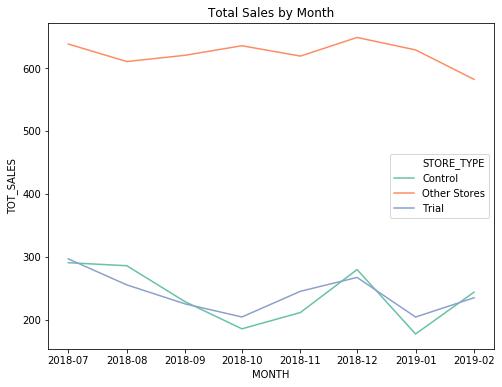

In [629]:
plt.figure(figsize=(8,6))


TotalSale = sns.lineplot(x='MONTH',y='TOT_SALES', hue = 'STORE_TYPE', data=tot_by_month, palette = 'Set2')
TotalSale.set_title('Total Sales by Month')

#### Visual checks on trends based on Number of Customers

In [630]:
nCustomers = preTrial.groupby(['MONTH','STORE_TYPE']).mean()['Num_Cus'].reset_index()
nCustomers

,MONTH,STORE_TYPE,Num_Cus
0,2018-07-01,Control,51.000000
1,2018-07-01,Other Stores,72.333333
2,2018-07-01,Trial,51.000000
3,2018-08-01,Control,48.000000
4,2018-08-01,Other Stores,72.120155
5,2018-08-01,Trial,47.000000
6,2018-09-01,Control,42.000000
7,2018-09-01,Other Stores,70.131783
8,2018-09-01,Trial,42.000000
9,2018-10-01,Control,35.000000


Text(0.5, 1.0, 'Total Number of Customers by Month')

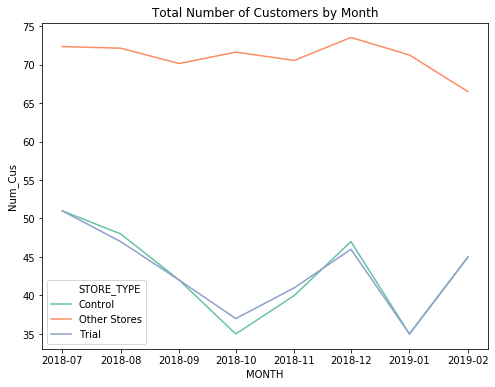

In [631]:
plt.figure(figsize=(8,6))

tot_cus = sns.lineplot(x='MONTH',y='Num_Cus', hue = 'STORE_TYPE', data=nCustomers, palette = 'Set2')
tot_cus.set_title('Total Number of Customers by Month')

#### Scale the control store's sales

In [632]:
trial_index = store_measures.loc[store_measures['MONTH_ID'] >= 201902].index
preTrial = store_measures.drop(trial_index)
preTrial

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3110,272,201809,304.7,32,1.125000,1.972222,4.291549
3111,272,201810,430.6,44,1.136364,1.980000,4.349495
3112,272,201811,376.2,41,1.097561,1.933333,4.324138
3113,272,201812,403.9,47,1.000000,1.893617,4.538202


In [633]:
pre_tot = preTrial.groupby('STORE_NBR').sum()['TOT_SALES'].reset_index()

pre_i = pre_tot.loc[pre_tot['STORE_NBR'] !=77].index
pre_77 = pre_tot.drop(pre_i)

pre_j = pre_tot.loc[pre_tot['STORE_NBR'] !=233].index
pre_233 = pre_tot.drop(pre_j)

In [634]:
scalingFactor = pre_77.iloc[0]['TOT_SALES'] /pre_233.iloc[0]['TOT_SALES']
scalingFactor

1.023617303289553

In [635]:
t_j = store_measures.loc[store_measures['STORE_NBR'] !=233].index
t_233 = store_measures.drop(t_j)

t_i = store_measures.loc[store_measures['STORE_NBR'] !=77].index
t_77 = store_measures.drop(t_i)

t_233['Control_Sale'] = t_233['TOT_SALES']* scalingFactor
t_233

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice,Control_Sale
2652,233,201807,290.7,51,1.058824,1.629630,3.303409,297.565550
2653,233,201808,285.9,48,1.041667,1.600000,3.573750,292.652187
2654,233,201809,228.6,42,1.071429,1.555556,3.265714,233.998916
2655,233,201810,185.7,35,1.028571,1.555556,3.316071,190.085733
2656,233,201811,211.6,40,1.025000,1.512195,3.412903,216.597421
2657,233,201812,279.8,47,1.063830,1.500000,3.730667,286.408121
2658,233,201901,177.5,35,1.000000,1.342857,3.776596,181.692071
2659,233,201902,244.0,45,1.044444,1.489362,3.485714,249.762622
2660,233,201903,199.1,40,1.025000,1.439024,3.374576,203.802205
2661,233,201904,158.6,30,1.066667,1.437500,3.447826,162.345704


In [636]:
tot_combine = pd.merge(t_233, t_77, on ='MONTH_ID')
tot_combine = tot_combine.drop(tot_combine.columns[[2,3,4,5,6,10,11,12,13]], axis=1)
tot_combine

,STORE_NBR_x,MONTH_ID,Control_Sale,STORE_NBR_y,TOT_SALES_y
0,233,201807,297.565550,77,296.8
1,233,201808,292.652187,77,255.5
2,233,201809,233.998916,77,225.2
3,233,201810,190.085733,77,204.5
4,233,201811,216.597421,77,245.3
5,233,201812,286.408121,77,267.3
6,233,201901,181.692071,77,204.4
7,233,201902,249.762622,77,235.0
8,233,201903,203.802205,77,278.5
9,233,201904,162.345704,77,263.5


In [637]:
tot_combine['Percent_Diff'] = abs(tot_combine['Control_Sale'] - tot_combine['TOT_SALES_y']) /tot_combine['Control_Sale']
tot_combine

,STORE_NBR_x,MONTH_ID,Control_Sale,STORE_NBR_y,TOT_SALES_y,Percent_Diff
0,233,201807,297.565550,77,296.8,0.002573
1,233,201808,292.652187,77,255.5,0.126950
2,233,201809,233.998916,77,225.2,0.037602
3,233,201810,190.085733,77,204.5,0.075830
4,233,201811,216.597421,77,245.3,0.132516
5,233,201812,286.408121,77,267.3,0.066716
6,233,201901,181.692071,77,204.4,0.124980
7,233,201902,249.762622,77,235.0,0.059107
8,233,201903,203.802205,77,278.5,0.366521
9,233,201904,162.345704,77,263.5,0.623080


In [638]:
trial_index = tot_combine.loc[tot_combine['MONTH_ID'] >= 201902].index
preTrial = tot_combine.drop(trial_index)

pre_index = tot_combine.loc[tot_combine['MONTH_ID'] < 201902].index
Trial = tot_combine.drop(pre_index)

#### As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period 

In [639]:
stdDev = statistics.stdev(preTrial['Percent_Diff'])
stdDev

0.049940762641425544

#### We will test with a null hypothesis of there being 0 difference between trial and control stores

In [640]:
d_index = Trial.loc[Trial['MONTH_ID'] >= 201905].index
test = Trial.drop(d_index)
test['tValue'] = ( test['Percent_Diff'] - 0) / stdDev
test

,STORE_NBR_x,MONTH_ID,Control_Sale,STORE_NBR_y,TOT_SALES_y,Percent_Diff,tValue
7,233,201902,249.762622,77,235.0,0.059107,1.183534
8,233,201903,203.802205,77,278.5,0.366521,7.339116
9,233,201904,162.345704,77,263.5,0.623080,12.476373


#### Find the 95th percentile of the t distribution with the appropriate degrees of freedom to compare against

In [641]:
percentile = 0.95
dof = 7
scipy.stats.t.ppf(percentile,dof) 

1.894578605061305

#### We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.


#### Let’s create a more visual version of this by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.

In [642]:
store_measures

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3115,272,201902,395.5,45,1.066667,1.895833,4.346154
3116,272,201903,442.3,50,1.060000,1.905660,4.379208
3117,272,201904,445.1,54,1.018519,1.909091,4.239048
3118,272,201905,314.6,34,1.176471,1.775000,4.430986


In [643]:
past_Sales = store_measures.drop(store_measures.columns[[3,4,5,6]], axis=1)
past_Sales

,STORE_NBR,MONTH_ID,TOT_SALES
0,1,201807,206.9
1,1,201808,176.1
2,1,201809,278.8
3,1,201810,188.1
4,1,201811,192.6
...,...,...,...
3115,272,201902,395.5
3116,272,201903,442.3
3117,272,201904,445.1
3118,272,201905,314.6


In [644]:
def classification(row):
    if row['STORE_NBR'] == 77:
        return 'Trial'
    elif row['STORE_NBR'] == 233:
        return 'Control'
    else:
        return 'Other Stores'

past_Sales['STORE_TYPE'] = past_Sales.apply(classification, axis=1)


i = past_Sales.loc[past_Sales['STORE_TYPE']=='Other Stores'].index
past_Sales = past_Sales.drop(i)
past_Sales

,STORE_NBR,MONTH_ID,TOT_SALES,STORE_TYPE
864,77,201807,296.8,Trial
865,77,201808,255.5,Trial
866,77,201809,225.2,Trial
867,77,201810,204.5,Trial
868,77,201811,245.3,Trial
869,77,201812,267.3,Trial
870,77,201901,204.4,Trial
871,77,201902,235.0,Trial
872,77,201903,278.5,Trial
873,77,201904,263.5,Trial


In [645]:
i = past_Sales.loc[past_Sales['STORE_NBR']!=233].index
measure_95 = past_Sales.drop(i)
measure_95['TOT_SALES'] = measure_95['TOT_SALES'] * (1 + stdDev * 2)
measure_95['STORE_TYPE'] = 'Control 95th % confidence'
measure_95


,STORE_NBR,MONTH_ID,TOT_SALES,STORE_TYPE
2652,233,201807,319.735559,Control 95th % confidence
2653,233,201808,314.456128,Control 95th % confidence
2654,233,201809,251.432917,Control 95th % confidence
2655,233,201810,204.247999,Control 95th % confidence
2656,233,201811,232.734931,Control 95th % confidence
2657,233,201812,307.746851,Control 95th % confidence
2658,233,201901,195.228971,Control 95th % confidence
2659,233,201902,268.371092,Control 95th % confidence
2660,233,201903,218.986412,Control 95th % confidence
2661,233,201904,174.441210,Control 95th % confidence


In [646]:
j = past_Sales.loc[past_Sales['STORE_NBR']!=233].index
measure_5 = past_Sales.drop(j)
measure_5['TOT_SALES'] = measure_5['TOT_SALES'] * (1 - stdDev * 2)
measure_5['STORE_TYPE'] = 'Control 5th % confidence'
measure_5


,STORE_NBR,MONTH_ID,TOT_SALES,STORE_TYPE
2652,233,201807,261.664441,Control 5th % confidence
2653,233,201808,257.343872,Control 5th % confidence
2654,233,201809,205.767083,Control 5th % confidence
2655,233,201810,167.152001,Control 5th % confidence
2656,233,201811,190.465069,Control 5th % confidence
2657,233,201812,251.853149,Control 5th % confidence
2658,233,201901,159.771029,Control 5th % confidence
2659,233,201902,219.628908,Control 5th % confidence
2660,233,201903,179.213588,Control 5th % confidence
2661,233,201904,142.758790,Control 5th % confidence


In [647]:
assessment = pd.concat([past_Sales, measure_95, measure_5])
assessment['MONTH'] = pd.to_datetime(assessment['MONTH_ID'].astype(int),format='%Y%m')
assessment.head()

,STORE_NBR,MONTH_ID,TOT_SALES,STORE_TYPE,MONTH
864,77,201807,296.8,Trial,2018-07-01
865,77,201808,255.5,Trial,2018-08-01
866,77,201809,225.2,Trial,2018-09-01
867,77,201810,204.5,Trial,2018-10-01
868,77,201811,245.3,Trial,2018-11-01


[(0, 400)]

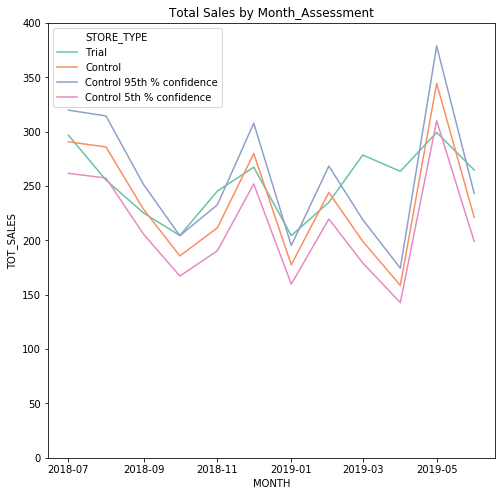

In [648]:
plt.figure(figsize=(8,8))

ass = sns.lineplot(x='MONTH',y='TOT_SALES', hue = 'STORE_TYPE', data=assessment, palette = 'Set2')
ass.set_title('Total Sales by Month_Assessment')
ass. set(ylim=(0, 400))

#### The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months

#### Scale the control store's number of customers

In [649]:
trial_index = store_measures.loc[store_measures['MONTH_ID'] >= 201902].index
preTrial = store_measures.drop(trial_index)
preTrial

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3110,272,201809,304.7,32,1.125000,1.972222,4.291549
3111,272,201810,430.6,44,1.136364,1.980000,4.349495
3112,272,201811,376.2,41,1.097561,1.933333,4.324138
3113,272,201812,403.9,47,1.000000,1.893617,4.538202


In [650]:
pre_cus = preTrial.groupby('STORE_NBR').sum()['Num_Cus'].reset_index()

pre_i = pre_cus.loc[pre_cus['STORE_NBR'] !=77].index
pre_77 = pre_cus.drop(pre_i)

pre_j = pre_cus.loc[pre_cus['STORE_NBR'] !=233].index
pre_233 = pre_cus.drop(pre_j)

In [651]:
scalingFactor = pre_77.iloc[0]['Num_Cus'] /pre_233.iloc[0]['Num_Cus']
scalingFactor

1.0033557046979866

In [652]:
t_j = store_measures.loc[store_measures['STORE_NBR'] !=233].index
t_233 = store_measures.drop(t_j)

t_i = store_measures.loc[store_measures['STORE_NBR'] !=77].index
t_77 = store_measures.drop(t_i)

t_233['Control_nCus'] = t_233['Num_Cus']* scalingFactor
t_233

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice,Control_nCus
2652,233,201807,290.7,51,1.058824,1.629630,3.303409,51.171141
2653,233,201808,285.9,48,1.041667,1.600000,3.573750,48.161074
2654,233,201809,228.6,42,1.071429,1.555556,3.265714,42.140940
2655,233,201810,185.7,35,1.028571,1.555556,3.316071,35.117450
2656,233,201811,211.6,40,1.025000,1.512195,3.412903,40.134228
2657,233,201812,279.8,47,1.063830,1.500000,3.730667,47.157718
2658,233,201901,177.5,35,1.000000,1.342857,3.776596,35.117450
2659,233,201902,244.0,45,1.044444,1.489362,3.485714,45.151007
2660,233,201903,199.1,40,1.025000,1.439024,3.374576,40.134228
2661,233,201904,158.6,30,1.066667,1.437500,3.447826,30.100671


In [653]:
tot_combine = pd.merge(t_233, t_77, on ='MONTH_ID')
tot_combine = tot_combine.drop(tot_combine.columns[[2,3,4,5,6,9,11,12,13]], axis=1)
tot_combine

,STORE_NBR_x,MONTH_ID,Control_nCus,STORE_NBR_y,Num_Cus_y
0,233,201807,51.171141,77,51
1,233,201808,48.161074,77,47
2,233,201809,42.140940,77,42
3,233,201810,35.117450,77,37
4,233,201811,40.134228,77,41
5,233,201812,47.157718,77,46
6,233,201901,35.117450,77,35
7,233,201902,45.151007,77,45
8,233,201903,40.134228,77,50
9,233,201904,30.100671,77,47


In [654]:
tot_combine['Percent_Diff'] = abs(tot_combine['Control_nCus'] - tot_combine['Num_Cus_y']) /tot_combine['Control_nCus']
tot_combine

,STORE_NBR_x,MONTH_ID,Control_nCus,STORE_NBR_y,Num_Cus_y,Percent_Diff
0,233,201807,51.171141,77,51,0.003344
1,233,201808,48.161074,77,47,0.024108
2,233,201809,42.140940,77,42,0.003344
3,233,201810,35.117450,77,37,0.053607
4,233,201811,40.134228,77,41,0.021572
5,233,201812,47.157718,77,46,0.024550
6,233,201901,35.117450,77,35,0.003344
7,233,201902,45.151007,77,45,0.003344
8,233,201903,40.134228,77,50,0.245819
9,233,201904,30.100671,77,47,0.561427


In [655]:
trial_index = tot_combine.loc[tot_combine['MONTH_ID'] >= 201902].index
preTrial = tot_combine.drop(trial_index)

pre_index = tot_combine.loc[tot_combine['MONTH_ID'] < 201902].index
Trial = tot_combine.drop(pre_index)

In [656]:
stdDev = statistics.stdev(preTrial['Percent_Diff'])
stdDev

0.018240748558243945

In [657]:
d_index = Trial.loc[Trial['MONTH_ID'] >= 201905].index
test = Trial.drop(d_index)
test['tValue'] = ( test['Percent_Diff'] - 0) / stdDev
test

,STORE_NBR_x,MONTH_ID,Control_nCus,STORE_NBR_y,Num_Cus_y,Percent_Diff,tValue
7,233,201902,45.151007,77,45,0.003344,0.183352
8,233,201903,40.134228,77,50,0.245819,13.476388
9,233,201904,30.100671,77,47,0.561427,30.778725


In [658]:
percentile = 0.95
dof = 7
scipy.stats.t.ppf(percentile,dof) 

1.894578605061305

#### Visual checks on trends based on Number of Customers

In [659]:
store_measures

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3115,272,201902,395.5,45,1.066667,1.895833,4.346154
3116,272,201903,442.3,50,1.060000,1.905660,4.379208
3117,272,201904,445.1,54,1.018519,1.909091,4.239048
3118,272,201905,314.6,34,1.176471,1.775000,4.430986


In [660]:
past_nCus = store_measures.drop(store_measures.columns[[2,4,5,6]], axis=1)
past_nCus

,STORE_NBR,MONTH_ID,Num_Cus
0,1,201807,49
1,1,201808,42
2,1,201809,59
3,1,201810,44
4,1,201811,46
...,...,...,...
3115,272,201902,45
3116,272,201903,50
3117,272,201904,54
3118,272,201905,34


In [661]:
def classification(row):
    if row['STORE_NBR'] == 77:
        return 'Trial'
    elif row['STORE_NBR'] == 233:
        return 'Control'
    else:
        return 'Other Stores'

past_nCus['STORE_TYPE'] = past_nCus.apply(classification, axis=1)


i = past_nCus.loc[past_nCus['STORE_TYPE']=='Other Stores'].index
past_nCus = past_nCus.drop(i)
past_nCus

,STORE_NBR,MONTH_ID,Num_Cus,STORE_TYPE
864,77,201807,51,Trial
865,77,201808,47,Trial
866,77,201809,42,Trial
867,77,201810,37,Trial
868,77,201811,41,Trial
869,77,201812,46,Trial
870,77,201901,35,Trial
871,77,201902,45,Trial
872,77,201903,50,Trial
873,77,201904,47,Trial


In [662]:
i = past_nCus.loc[past_nCus['STORE_NBR']!=233].index
measure_95 = past_nCus.drop(i)
measure_95['Num_Cus'] = measure_95['Num_Cus'] * (1 + stdDev * 2)
measure_95['STORE_TYPE'] = 'Control 95th % confidence'
measure_95

,STORE_NBR,MONTH_ID,Num_Cus,STORE_TYPE
2652,233,201807,52.860556,Control 95th % confidence
2653,233,201808,49.751112,Control 95th % confidence
2654,233,201809,43.532223,Control 95th % confidence
2655,233,201810,36.276852,Control 95th % confidence
2656,233,201811,41.459260,Control 95th % confidence
2657,233,201812,48.714630,Control 95th % confidence
2658,233,201901,36.276852,Control 95th % confidence
2659,233,201902,46.641667,Control 95th % confidence
2660,233,201903,41.459260,Control 95th % confidence
2661,233,201904,31.094445,Control 95th % confidence


In [663]:
j = past_nCus.loc[past_nCus['STORE_NBR']!=233].index
measure_5 = past_nCus.drop(i)
measure_5['Num_Cus'] = measure_5['Num_Cus'] * (1 - stdDev * 2)
measure_5['STORE_TYPE'] = 'Control 5th % confidence'
measure_5

,STORE_NBR,MONTH_ID,Num_Cus,STORE_TYPE
2652,233,201807,49.139444,Control 5th % confidence
2653,233,201808,46.248888,Control 5th % confidence
2654,233,201809,40.467777,Control 5th % confidence
2655,233,201810,33.723148,Control 5th % confidence
2656,233,201811,38.540740,Control 5th % confidence
2657,233,201812,45.285370,Control 5th % confidence
2658,233,201901,33.723148,Control 5th % confidence
2659,233,201902,43.358333,Control 5th % confidence
2660,233,201903,38.540740,Control 5th % confidence
2661,233,201904,28.905555,Control 5th % confidence


In [664]:
assessment = pd.concat([past_nCus, measure_95, measure_5])
assessment['MONTH'] = pd.to_datetime(assessment['MONTH_ID'].astype(int),format='%Y%m')
assessment.head()

,STORE_NBR,MONTH_ID,Num_Cus,STORE_TYPE,MONTH
864,77,201807,51.0,Trial,2018-07-01
865,77,201808,47.0,Trial,2018-08-01
866,77,201809,42.0,Trial,2018-09-01
867,77,201810,37.0,Trial,2018-10-01
868,77,201811,41.0,Trial,2018-11-01


[(0, 60)]

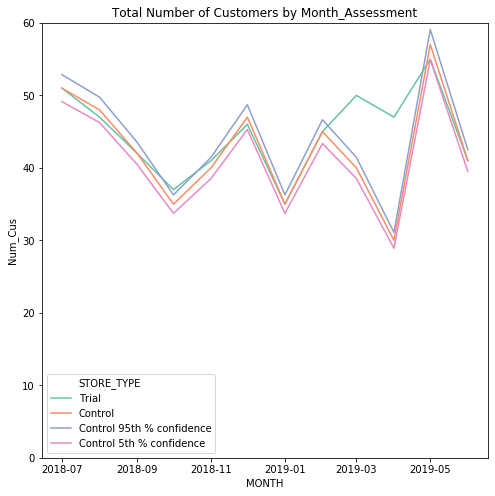

In [665]:
plt.figure(figsize=(8,8))

ass = sns.lineplot(x='MONTH',y='Num_Cus', hue = 'STORE_TYPE', data=assessment, palette = 'Set2')
ass.set_title('Total Number of Customers by Month_Assessment')
ass. set(ylim=(0, 60))

### Select Control Stores for Trial Store 86

##### Correlation Against Store 86 Based on Total Sales and Number of Customers

In [867]:
trial_index = store_measures.loc[store_measures['MONTH_ID'] >= 201903].index
preTrial = store_measures.drop(trial_index)
preTrial

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3111,272,201810,430.6,44,1.136364,1.980000,4.349495
3112,272,201811,376.2,41,1.097561,1.933333,4.324138
3113,272,201812,403.9,47,1.000000,1.893617,4.538202
3114,272,201901,423.0,46,1.086957,1.920000,4.406250


In [868]:
trial_store_77_i = preTrial.loc[preTrial['STORE_NBR'] !=77].index
trial_store_77 = preTrial.drop(trial_store_77_i)

trial_store_86_i = preTrial.loc[preTrial['STORE_NBR'] !=86].index
trial_store_86 = preTrial.drop(trial_store_86_i)

trial_store_88_i = preTrial.loc[preTrial['STORE_NBR'] !=88].index
trial_store_88 = preTrial.drop(trial_store_88_i)

trial_stores = pd.concat([trial_store_77,trial_store_86,trial_store_88])

control_store_i_1 = preTrial.loc[preTrial['STORE_NBR'] == 77].index
control_store_i_2 = preTrial.loc[preTrial['STORE_NBR'] == 86].index
control_store_i_3 = preTrial.loc[preTrial['STORE_NBR'] == 88].index
control_stores1 = preTrial.drop(control_store_i_1)
control_stores2 = control_stores1.drop(control_store_i_2)
control_stores = control_stores2.drop(control_store_i_3)
control_stores

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3111,272,201810,430.6,44,1.136364,1.980000,4.349495
3112,272,201811,376.2,41,1.097561,1.933333,4.324138
3113,272,201812,403.9,47,1.000000,1.893617,4.538202
3114,272,201901,423.0,46,1.086957,1.920000,4.406250


In [869]:
store_num = control_stores['STORE_NBR'].unique()

trial_num = [86]

# Total Sales: m = 2
m = 2

C_Stores = []
T_Stores = []
Corr_Results = []
for t in trial_num:
    for c in store_num:
        result = getCorr(c,m,t)
        C_Stores.append(c)
        T_Stores.append(t)
        Corr_Results.append(result)
        
Correlation_Matrix1 = pd.DataFrame({'Trial' : T_Stores,
                                'Control' : C_Stores,
                                'Correlation' : Corr_Results }, 
                                columns=['Trial','Control', 'Correlation'])
Correlation_Matrix1.sort_values('Correlation', ascending = False)

,Trial,Control,Correlation
144,86,155,0.841589
244,86,260,0.736378
20,86,22,0.722506
5,86,6,0.683779
253,86,269,0.681775
...,...,...,...
174,86,185,-0.776159
238,86,254,-0.780106
200,86,214,-0.783369
240,86,256,-0.849045


In [870]:
store_num = control_stores['STORE_NBR'].unique()

trial_num = [86]

# Number of Customers: m = 3
m = 3

C_Stores = []
T_Stores = []
Corr_Results = []
for t in trial_num:
    for c in store_num:
        result = getCorr(c,m,t)
        C_Stores.append(c)
        T_Stores.append(t)
        Corr_Results.append(result)
        
Correlation_Matrix2 = pd.DataFrame({'Trial' : T_Stores,
                                'Control' : C_Stores,
                                'Correlation' : Corr_Results }, 
                                columns=['Trial','Control', 'Correlation'])
Correlation_Matrix2.sort_values('Correlation', ascending = False)

,Trial,Control,Correlation
244,86,260,0.772289
136,86,147,0.728606
165,86,176,0.710471
70,86,74,0.701439
144,86,155,0.646118
...,...,...,...
25,86,27,-0.785631
254,86,270,-0.803394
109,86,120,-0.814822
44,86,48,-0.815227


#### Magnitude Distance Against Store 86 Based on Total Sales

In [871]:
store_num = control_stores['STORE_NBR'].unique()

trial_num = [86]

# Total Sale
m = 2

mag_list1 = []
for t in trial_num:
    for c in store_num:
        result = getMag(c,m,t)
        mag_list1.append(result)
mag_matrix1 = pd.concat(mag_list1)

mag_matrix1.rename(columns={'STORE_NBR_x': 'Control', 'STORE_NBR_y': 'Trial'}, inplace=True)
mag_matrix1

,Control,Trial,MONTH_ID,Magnitude
0,1,86,201807,685.30
1,1,86,201808,587.95
2,1,86,201809,635.80
3,1,86,201810,760.30
4,1,86,201811,725.40
...,...,...,...,...
3,272,86,201810,517.80
4,272,86,201811,541.80
5,272,86,201812,437.30
6,272,86,201901,418.40


In [872]:
minDist = mag_matrix1.groupby(['Control','Trial']).min()['Magnitude'].reset_index()
maxDist = mag_matrix1.groupby(['Control','Trial']).max()['Magnitude'].reset_index()

MinMaxDist = pd.merge(minDist, maxDist, on = ('Control','Trial'))

MinMaxDist.rename(columns={'Magnitude_x': 'Min','Magnitude_y':'Max'}, inplace=True)                  

standard_mag = pd.merge(mag_matrix1,MinMaxDist, on = ('Control','Trial'))
standard_mag['Mag_Measure'] = 1 - (standard_mag['Magnitude'] -standard_mag['Min'] ) / (standard_mag['Max'] - standard_mag['Min'])

finalDist1 = standard_mag.groupby(['Control','Trial']).mean()['Mag_Measure'].reset_index()
finalDist1

,Control,Trial,Mag_Measure
0,1,86,0.479874
1,2,86,0.285031
2,3,86,0.461317
3,4,86,0.464945
4,5,86,0.579356
...,...,...,...
252,268,86,0.271594
253,269,86,0.530061
254,270,86,0.572281
255,271,86,0.514646


#### Magnitude Distance Against Store 86 Based on Number of Customers

In [873]:
store_num = control_stores['STORE_NBR'].unique()

trial_num = [86]

# Number of Customers
m = 3

mag_list = []
for t in trial_num:
    for c in store_num:
        result = getMag(c,m,t)
        mag_list.append(result)
mag_matrix2 = pd.concat(mag_list)

mag_matrix2.rename(columns={'STORE_NBR_x': 'Control', 'STORE_NBR_y': 'Trial'}, inplace=True)


In [874]:
minDist = mag_matrix2.groupby(['Control','Trial']).min()['Magnitude'].reset_index()
maxDist = mag_matrix2.groupby(['Control','Trial']).max()['Magnitude'].reset_index()

MinMaxDist = pd.merge(minDist, maxDist, on = ('Control','Trial'))

MinMaxDist.rename(columns={'Magnitude_x': 'Min','Magnitude_y':'Max'}, inplace=True)                  

standard_mag = pd.merge(mag_matrix2,MinMaxDist, on = ('Control','Trial'))
standard_mag['Mag_Measure'] = 1 - (standard_mag['Magnitude'] -standard_mag['Min'] ) / (standard_mag['Max'] - standard_mag['Min'])

finalDist2 = standard_mag.groupby(['Control','Trial']).mean()['Mag_Measure'].reset_index()
finalDist2

,Control,Trial,Mag_Measure
0,1,86,0.505952
1,2,86,0.560185
2,3,86,0.558824
3,4,86,0.558824
4,5,86,0.631579
...,...,...,...
252,268,86,0.500000
253,269,86,0.616071
254,270,86,0.638889
255,271,86,0.607143


In [875]:
corr_weight = 0.5
combined_tot = pd.merge(Correlation_Matrix1,finalDist1, on = ['Control','Trial'] )
combined_tot['Combined_Score'] = corr_weight*combined_tot['Correlation'] + (1-corr_weight)*combined_tot['Mag_Measure'] 
combined_tot

,Trial,Control,Correlation,Mag_Measure,Combined_Score
0,86,1,0.478355,0.479874,0.479114
1,86,2,-0.453556,0.285031,-0.084263
2,86,3,-0.081104,0.461317,0.190107
3,86,4,-0.204603,0.464945,0.130171
4,86,5,0.067263,0.579356,0.323310
...,...,...,...,...,...
252,86,268,-0.494257,0.271594,-0.111331
253,86,269,0.681775,0.530061,0.605918
254,86,270,-0.747037,0.572281,-0.087378
255,86,271,0.409585,0.514646,0.462116


In [876]:
corr_weight = 0.5
combined_nCus = pd.merge(Correlation_Matrix2,finalDist2, on = ['Control','Trial'] )
combined_nCus['Combined_Score'] = corr_weight*combined_nCus['Correlation'] + (1-corr_weight)*combined_nCus['Mag_Measure'] 
combined_nCus

,Trial,Control,Correlation,Mag_Measure,Combined_Score
0,86,1,0.559062,0.505952,0.532507
1,86,2,-0.428881,0.560185,0.065652
2,86,3,0.026475,0.558824,0.292649
3,86,4,-0.462982,0.558824,0.047921
4,86,5,-0.391022,0.631579,0.120279
...,...,...,...,...,...
252,86,268,-0.203460,0.500000,0.148270
253,86,269,-0.236966,0.616071,0.189553
254,86,270,-0.803394,0.638889,-0.082253
255,86,271,-0.024829,0.607143,0.291157


In [877]:
combined_86 = pd.merge(combined_tot,combined_nCus, on = ['Control','Trial'] )
combined_86['Overall_Score'] = 0.5*combined_86['Combined_Score_x'] + 0.5*combined_86['Combined_Score_y'] 
combined_86.sort_values('Overall_Score', ascending = False)

,Trial,Control,Correlation_x,Mag_Measure_x,Combined_Score_x,Correlation_y,Mag_Measure_y,Combined_Score_y,Overall_Score
144,86,155,0.841589,0.752673,0.797131,0.646118,0.770833,0.708476,0.752803
99,86,109,0.674976,0.557134,0.616055,0.404255,0.741667,0.572961,0.594508
244,86,260,0.736378,0.410996,0.573687,0.772289,0.413462,0.592875,0.583281
217,86,232,0.542806,0.752006,0.647406,0.309274,0.705882,0.507578,0.577492
214,86,229,0.418894,0.552198,0.485546,0.575004,0.704545,0.639775,0.562660
...,...,...,...,...,...,...,...,...,...
238,86,254,-0.780106,0.349959,-0.215073,-0.637747,0.495833,-0.070957,-0.143015
25,86,27,-0.762542,0.427863,-0.167339,-0.785631,0.543919,-0.120856,-0.144098
240,86,256,-0.849045,0.324515,-0.262265,-0.601597,0.437500,-0.082049,-0.172157
174,86,185,-0.776159,0.320819,-0.227670,-0.746259,0.405172,-0.170543,-0.199107


#### Looks like store 155 will be a control store for trial store 86.

#### Visual checks on trends based on Total Sales

In [878]:
preTrial

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3111,272,201810,430.6,44,1.136364,1.980000,4.349495
3112,272,201811,376.2,41,1.097561,1.933333,4.324138
3113,272,201812,403.9,47,1.000000,1.893617,4.538202
3114,272,201901,423.0,46,1.086957,1.920000,4.406250


In [879]:
def classification(row):
    if row['STORE_NBR'] == 86:
        return 'Trial'
    elif row['STORE_NBR'] == 155:
        return 'Control'
    else:
        return 'Other Stores'

preTrial['STORE_TYPE'] = preTrial.apply(classification, axis=1)

preTrial

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice,STORE_TYPE
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores
...,...,...,...,...,...,...,...,...
3111,272,201810,430.6,44,1.136364,1.980000,4.349495,Other Stores
3112,272,201811,376.2,41,1.097561,1.933333,4.324138,Other Stores
3113,272,201812,403.9,47,1.000000,1.893617,4.538202,Other Stores
3114,272,201901,423.0,46,1.086957,1.920000,4.406250,Other Stores


In [880]:
preTrial['MONTH'] = pd.to_datetime(preTrial['MONTH_ID'].astype(int),format='%Y%m')

In [881]:
tot_by_month = preTrial.groupby(['MONTH','STORE_TYPE']).mean()['TOT_SALES'].reset_index()
tot_by_month.head()

,MONTH,STORE_TYPE,TOT_SALES
0,2018-07-01,Control,924.600000
1,2018-07-01,Other Stores,633.239922
2,2018-07-01,Trial,892.200000
3,2018-08-01,Control,782.700000
4,2018-08-01,Other Stores,606.326744


Text(0.5, 1.0, 'Total Sales by Month')

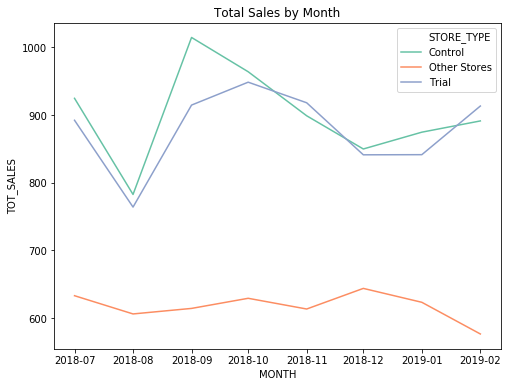

In [882]:
plt.figure(figsize=(8,6))


TotalSale = sns.lineplot(x='MONTH',y='TOT_SALES', hue = 'STORE_TYPE', data=tot_by_month, palette = 'Set2')
TotalSale.set_title('Total Sales by Month')

#### Visual checks on trends based on Number of Customers

In [883]:
nCustomers = preTrial.groupby(['MONTH','STORE_TYPE']).mean()['Num_Cus'].reset_index()
nCustomers.head()

,MONTH,STORE_TYPE,Num_Cus
0,2018-07-01,Control,101.000000
1,2018-07-01,Other Stores,71.953488
2,2018-07-01,Trial,99.000000
3,2018-08-01,Control,91.000000
4,2018-08-01,Other Stores,71.771318


Text(0.5, 1.0, 'Total Number of Customers by Month')

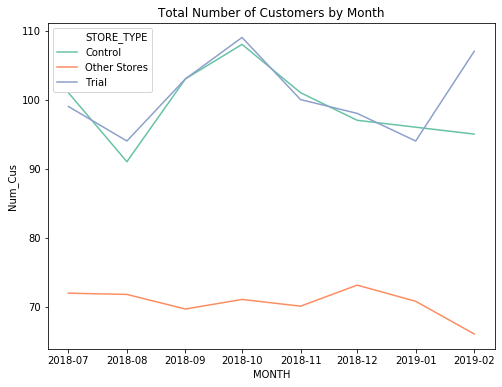

In [884]:
plt.figure(figsize=(8,6))

tot_cus = sns.lineplot(x='MONTH',y='Num_Cus', hue = 'STORE_TYPE', data=nCustomers, palette = 'Set2')
tot_cus.set_title('Total Number of Customers by Month')

#### Scale the control store's sales

In [885]:
trial_index = store_measures.loc[store_measures['MONTH_ID'] >= 201902].index
preTrial = store_measures.drop(trial_index)
preTrial

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3110,272,201809,304.7,32,1.125000,1.972222,4.291549
3111,272,201810,430.6,44,1.136364,1.980000,4.349495
3112,272,201811,376.2,41,1.097561,1.933333,4.324138
3113,272,201812,403.9,47,1.000000,1.893617,4.538202


In [886]:
pre_tot = preTrial.groupby('STORE_NBR').sum()['TOT_SALES'].reset_index()

pre_i = pre_tot.loc[pre_tot['STORE_NBR'] !=86].index
pre_86 = pre_tot.drop(pre_i)

pre_j = pre_tot.loc[pre_tot['STORE_NBR'] !=155].index
pre_155 = pre_tot.drop(pre_j)

In [887]:
scalingFactor = pre_86.iloc[0]['TOT_SALES'] /pre_155.iloc[0]['TOT_SALES']
scalingFactor

0.9700651481287746

In [888]:
t_j = store_measures.loc[store_measures['STORE_NBR'] !=155].index
t_155 = store_measures.drop(t_j)

t_i = store_measures.loc[store_measures['STORE_NBR'] !=86].index
t_86 = store_measures.drop(t_i)

t_155['Control_Sale'] = t_155['TOT_SALES']* scalingFactor
t_155

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice,Control_Sale
1764,155,201807,924.60,101,1.217822,2.032520,3.698400,896.922236
1765,155,201808,782.70,91,1.307692,1.924370,3.417904,759.269991
1766,155,201809,1014.40,103,1.398058,2.013889,3.497931,984.034086
1767,155,201810,963.80,108,1.259259,2.000000,3.543382,934.948790
1768,155,201811,898.80,101,1.316832,2.030075,3.328889,871.894555
1769,155,201812,849.80,97,1.237113,2.016667,3.511570,824.361363
1770,155,201901,874.60,96,1.302083,2.016000,3.470635,848.418979
1771,155,201902,891.20,95,1.315789,2.032000,3.508661,864.522060
1772,155,201903,804.40,94,1.255319,2.033898,3.351667,780.320405
1773,155,201904,844.60,99,1.212121,2.016667,3.490083,819.317024


In [889]:
tot_combine = pd.merge(t_155, t_86, on ='MONTH_ID')
tot_combine = tot_combine.drop(tot_combine.columns[[2,3,4,5,6,10,11,12,13]], axis=1)
tot_combine

,STORE_NBR_x,MONTH_ID,Control_Sale,STORE_NBR_y,TOT_SALES_y
0,155,201807,896.922236,86,892.20
1,155,201808,759.269991,86,764.05
2,155,201809,984.034086,86,914.60
3,155,201810,934.948790,86,948.40
4,155,201811,871.894555,86,918.00
5,155,201812,824.361363,86,841.20
6,155,201901,848.418979,86,841.40
7,155,201902,864.522060,86,913.20
8,155,201903,780.320405,86,1026.80
9,155,201904,819.317024,86,848.20


In [890]:
tot_combine['Percent_Diff'] = abs(tot_combine['Control_Sale'] - tot_combine['TOT_SALES_y']) /tot_combine['Control_Sale']
tot_combine

,STORE_NBR_x,MONTH_ID,Control_Sale,STORE_NBR_y,TOT_SALES_y,Percent_Diff
0,155,201807,896.922236,86,892.20,0.005265
1,155,201808,759.269991,86,764.05,0.006296
2,155,201809,984.034086,86,914.60,0.070561
3,155,201810,934.948790,86,948.40,0.014387
4,155,201811,871.894555,86,918.00,0.052880
5,155,201812,824.361363,86,841.20,0.020426
6,155,201901,848.418979,86,841.40,0.008273
7,155,201902,864.522060,86,913.20,0.056306
8,155,201903,780.320405,86,1026.80,0.315870
9,155,201904,819.317024,86,848.20,0.035253


In [891]:
trial_index = tot_combine.loc[tot_combine['MONTH_ID'] >= 201902].index
preTrial = tot_combine.drop(trial_index)

pre_index = tot_combine.loc[tot_combine['MONTH_ID'] < 201902].index
Trial = tot_combine.drop(pre_index)

#### As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period 

In [892]:
stdDev = statistics.stdev(preTrial['Percent_Diff'])
stdDev

0.025833952854772586

#### Let’s create a more visual version of this by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store. 

In [893]:
store_measures

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3115,272,201902,395.5,45,1.066667,1.895833,4.346154
3116,272,201903,442.3,50,1.060000,1.905660,4.379208
3117,272,201904,445.1,54,1.018519,1.909091,4.239048
3118,272,201905,314.6,34,1.176471,1.775000,4.430986


In [894]:
past_Sales = store_measures.drop(store_measures.columns[[3,4,5,6]], axis=1)
past_Sales

,STORE_NBR,MONTH_ID,TOT_SALES
0,1,201807,206.9
1,1,201808,176.1
2,1,201809,278.8
3,1,201810,188.1
4,1,201811,192.6
...,...,...,...
3115,272,201902,395.5
3116,272,201903,442.3
3117,272,201904,445.1
3118,272,201905,314.6


In [895]:
def classification(row):
    if row['STORE_NBR'] == 86:
        return 'Trial'
    elif row['STORE_NBR'] == 155:
        return 'Control'
    else:
        return 'Other Stores'

past_Sales['STORE_TYPE'] = past_Sales.apply(classification, axis=1)


i = past_Sales.loc[past_Sales['STORE_TYPE']=='Other Stores'].index
past_Sales = past_Sales.drop(i)
past_Sales

,STORE_NBR,MONTH_ID,TOT_SALES,STORE_TYPE
960,86,201807,892.20,Trial
961,86,201808,764.05,Trial
962,86,201809,914.60,Trial
963,86,201810,948.40,Trial
964,86,201811,918.00,Trial
965,86,201812,841.20,Trial
966,86,201901,841.40,Trial
967,86,201902,913.20,Trial
968,86,201903,1026.80,Trial
969,86,201904,848.20,Trial


In [896]:
i = past_Sales.loc[past_Sales['STORE_NBR']!=155].index
measure_95 = past_Sales.drop(i)
measure_95['TOT_SALES'] = measure_95['TOT_SALES'] * (1 + stdDev * 2)
measure_95['STORE_TYPE'] = 'Control 95th % confidence'
measure_95

,STORE_NBR,MONTH_ID,TOT_SALES,STORE_TYPE
1764,155,201807,972.372146,Control 95th % confidence
1765,155,201808,823.140470,Control 95th % confidence
1766,155,201809,1066.811924,Control 95th % confidence
1767,155,201810,1013.597528,Control 95th % confidence
1768,155,201811,945.239114,Control 95th % confidence
1769,155,201812,893.707386,Control 95th % confidence
1770,155,201901,919.788750,Control 95th % confidence
1771,155,201902,937.246438,Control 95th % confidence
1772,155,201903,845.961663,Control 95th % confidence
1773,155,201904,888.238713,Control 95th % confidence


In [897]:
j = past_Sales.loc[past_Sales['STORE_NBR']!=155].index
measure_5 = past_Sales.drop(j)
measure_5['TOT_SALES'] = measure_5['TOT_SALES'] * (1 - stdDev * 2)
measure_5['STORE_TYPE'] = 'Control 5th % confidence'
measure_5

,STORE_NBR,MONTH_ID,TOT_SALES,STORE_TYPE
1764,155,201807,876.827854,Control 5th % confidence
1765,155,201808,742.259530,Control 5th % confidence
1766,155,201809,961.988076,Control 5th % confidence
1767,155,201810,914.002472,Control 5th % confidence
1768,155,201811,852.360886,Control 5th % confidence
1769,155,201812,805.892614,Control 5th % confidence
1770,155,201901,829.411250,Control 5th % confidence
1771,155,201902,845.153562,Control 5th % confidence
1772,155,201903,762.838337,Control 5th % confidence
1773,155,201904,800.961287,Control 5th % confidence


In [898]:
assessment = pd.concat([past_Sales, measure_95, measure_5])
assessment['MONTH'] = pd.to_datetime(assessment['MONTH_ID'].astype(int),format='%Y%m')
assessment.head()

,STORE_NBR,MONTH_ID,TOT_SALES,STORE_TYPE,MONTH
960,86,201807,892.20,Trial,2018-07-01
961,86,201808,764.05,Trial,2018-08-01
962,86,201809,914.60,Trial,2018-09-01
963,86,201810,948.40,Trial,2018-10-01
964,86,201811,918.00,Trial,2018-11-01


[(0, 1200)]

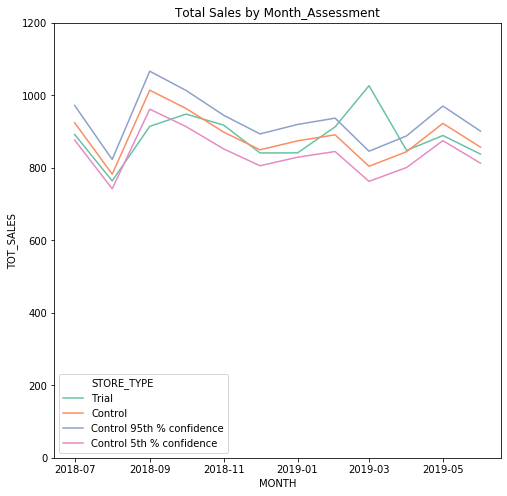

In [899]:
plt.figure(figsize=(8,8))

ass = sns.lineplot(x='MONTH',y='TOT_SALES', hue = 'STORE_TYPE', data=assessment, palette = 'Set2')
ass.set_title('Total Sales by Month_Assessment')
ass. set(ylim=(0, 1200))

#### The results show that the trial in store 86 is not significantly different to its control store in the trial period as the trial store performance lies inside the 5% to 95% confidence interval of the control store in two of the three trial months.


#### Assessing for Number of Customers as well

#### Scale the control store's number of customers

In [900]:
trial_index = store_measures.loc[store_measures['MONTH_ID'] >= 201902].index
preTrial = store_measures.drop(trial_index)
preTrial

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3110,272,201809,304.7,32,1.125000,1.972222,4.291549
3111,272,201810,430.6,44,1.136364,1.980000,4.349495
3112,272,201811,376.2,41,1.097561,1.933333,4.324138
3113,272,201812,403.9,47,1.000000,1.893617,4.538202


In [901]:
pre_cus = preTrial.groupby('STORE_NBR').sum()['Num_Cus'].reset_index()

pre_i = pre_cus.loc[pre_cus['STORE_NBR'] !=86].index
pre_86 = pre_cus.drop(pre_i)

pre_j = pre_cus.loc[pre_cus['STORE_NBR'] !=155].index
pre_155 = pre_cus.drop(pre_j)

In [902]:
scalingFactor = pre_86.iloc[0]['Num_Cus'] /pre_155.iloc[0]['Num_Cus']
scalingFactor

1.0

In [903]:
t_j = store_measures.loc[store_measures['STORE_NBR'] !=155].index
t_155 = store_measures.drop(t_j)

t_i = store_measures.loc[store_measures['STORE_NBR'] !=86].index
t_86 = store_measures.drop(t_i)

t_155['Control_nCus'] = t_155['Num_Cus']* scalingFactor
t_155

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice,Control_nCus
1764,155,201807,924.60,101,1.217822,2.032520,3.698400,101.0
1765,155,201808,782.70,91,1.307692,1.924370,3.417904,91.0
1766,155,201809,1014.40,103,1.398058,2.013889,3.497931,103.0
1767,155,201810,963.80,108,1.259259,2.000000,3.543382,108.0
1768,155,201811,898.80,101,1.316832,2.030075,3.328889,101.0
1769,155,201812,849.80,97,1.237113,2.016667,3.511570,97.0
1770,155,201901,874.60,96,1.302083,2.016000,3.470635,96.0
1771,155,201902,891.20,95,1.315789,2.032000,3.508661,95.0
1772,155,201903,804.40,94,1.255319,2.033898,3.351667,94.0
1773,155,201904,844.60,99,1.212121,2.016667,3.490083,99.0


In [904]:
tot_combine = pd.merge(t_155, t_86, on ='MONTH_ID')
tot_combine = tot_combine.drop(tot_combine.columns[[2,3,4,5,6,9,11,12,13]], axis=1)
tot_combine

,STORE_NBR_x,MONTH_ID,Control_nCus,STORE_NBR_y,Num_Cus_y
0,155,201807,101.0,86,99
1,155,201808,91.0,86,94
2,155,201809,103.0,86,103
3,155,201810,108.0,86,109
4,155,201811,101.0,86,100
5,155,201812,97.0,86,98
6,155,201901,96.0,86,94
7,155,201902,95.0,86,107
8,155,201903,94.0,86,115
9,155,201904,99.0,86,105


In [905]:
tot_combine['Percent_Diff'] = abs(tot_combine['Control_nCus'] - tot_combine['Num_Cus_y']) /tot_combine['Control_nCus']
tot_combine

,STORE_NBR_x,MONTH_ID,Control_nCus,STORE_NBR_y,Num_Cus_y,Percent_Diff
0,155,201807,101.0,86,99,0.019802
1,155,201808,91.0,86,94,0.032967
2,155,201809,103.0,86,103,0.000000
3,155,201810,108.0,86,109,0.009259
4,155,201811,101.0,86,100,0.009901
5,155,201812,97.0,86,98,0.010309
6,155,201901,96.0,86,94,0.020833
7,155,201902,95.0,86,107,0.126316
8,155,201903,94.0,86,115,0.223404
9,155,201904,99.0,86,105,0.060606


In [906]:
trial_index = tot_combine.loc[tot_combine['MONTH_ID'] >= 201902].index
preTrial = tot_combine.drop(trial_index)

pre_index = tot_combine.loc[tot_combine['MONTH_ID'] < 201902].index
Trial = tot_combine.drop(pre_index)

In [907]:
stdDev = statistics.stdev(preTrial['Percent_Diff'])
stdDev

0.010687444701395236

#### Visual checks on trends based on Number of Customers

In [908]:
store_measures

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3115,272,201902,395.5,45,1.066667,1.895833,4.346154
3116,272,201903,442.3,50,1.060000,1.905660,4.379208
3117,272,201904,445.1,54,1.018519,1.909091,4.239048
3118,272,201905,314.6,34,1.176471,1.775000,4.430986


In [909]:
past_nCus = store_measures.drop(store_measures.columns[[2,4,5,6]], axis=1)
past_nCus

,STORE_NBR,MONTH_ID,Num_Cus
0,1,201807,49
1,1,201808,42
2,1,201809,59
3,1,201810,44
4,1,201811,46
...,...,...,...
3115,272,201902,45
3116,272,201903,50
3117,272,201904,54
3118,272,201905,34


In [910]:
def classification(row):
    if row['STORE_NBR'] == 86:
        return 'Trial'
    elif row['STORE_NBR'] == 155:
        return 'Control'
    else:
        return 'Other Stores'

past_nCus['STORE_TYPE'] = past_nCus.apply(classification, axis=1)


i = past_nCus.loc[past_nCus['STORE_TYPE']=='Other Stores'].index
past_nCus = past_nCus.drop(i)
past_nCus

,STORE_NBR,MONTH_ID,Num_Cus,STORE_TYPE
960,86,201807,99,Trial
961,86,201808,94,Trial
962,86,201809,103,Trial
963,86,201810,109,Trial
964,86,201811,100,Trial
965,86,201812,98,Trial
966,86,201901,94,Trial
967,86,201902,107,Trial
968,86,201903,115,Trial
969,86,201904,105,Trial


In [911]:
i = past_nCus.loc[past_nCus['STORE_NBR']!=155].index
measure_95 = past_nCus.drop(i)
measure_95['Num_Cus'] = measure_95['Num_Cus'] * (1 + stdDev * 2)
measure_95['STORE_TYPE'] = 'Control 95th % confidence'
measure_95

,STORE_NBR,MONTH_ID,Num_Cus,STORE_TYPE
1764,155,201807,103.158864,Control 95th % confidence
1765,155,201808,92.945115,Control 95th % confidence
1766,155,201809,105.201614,Control 95th % confidence
1767,155,201810,110.308488,Control 95th % confidence
1768,155,201811,103.158864,Control 95th % confidence
1769,155,201812,99.073364,Control 95th % confidence
1770,155,201901,98.051989,Control 95th % confidence
1771,155,201902,97.030614,Control 95th % confidence
1772,155,201903,96.009240,Control 95th % confidence
1773,155,201904,101.116114,Control 95th % confidence


In [912]:
j = past_nCus.loc[past_nCus['STORE_NBR']!=155].index
measure_5 = past_nCus.drop(i)
measure_5['Num_Cus'] = measure_5['Num_Cus'] * (1 - stdDev * 2)
measure_5['STORE_TYPE'] = 'Control 5th % confidence'
measure_5

,STORE_NBR,MONTH_ID,Num_Cus,STORE_TYPE
1764,155,201807,98.841136,Control 5th % confidence
1765,155,201808,89.054885,Control 5th % confidence
1766,155,201809,100.798386,Control 5th % confidence
1767,155,201810,105.691512,Control 5th % confidence
1768,155,201811,98.841136,Control 5th % confidence
1769,155,201812,94.926636,Control 5th % confidence
1770,155,201901,93.948011,Control 5th % confidence
1771,155,201902,92.969386,Control 5th % confidence
1772,155,201903,91.990760,Control 5th % confidence
1773,155,201904,96.883886,Control 5th % confidence


In [913]:
assessment = pd.concat([past_nCus, measure_95, measure_5])
assessment['MONTH'] = pd.to_datetime(assessment['MONTH_ID'].astype(int),format='%Y%m')
assessment.head()

,STORE_NBR,MONTH_ID,Num_Cus,STORE_TYPE,MONTH
960,86,201807,99.0,Trial,2018-07-01
961,86,201808,94.0,Trial,2018-08-01
962,86,201809,103.0,Trial,2018-09-01
963,86,201810,109.0,Trial,2018-10-01
964,86,201811,100.0,Trial,2018-11-01


[(0, 120)]

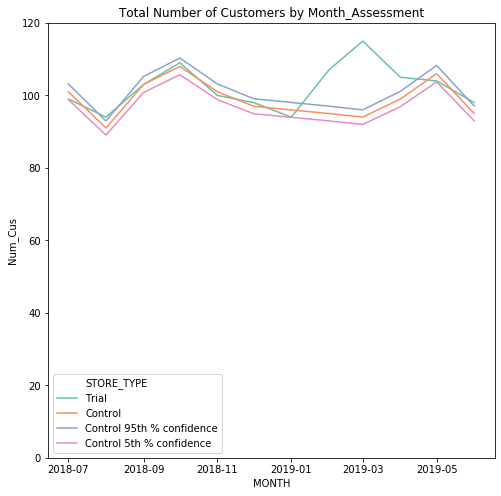

In [914]:
plt.figure(figsize=(8,8))

ass = sns.lineplot(x='MONTH',y='Num_Cus', hue = 'STORE_TYPE', data=assessment, palette = 'Set2')
ass.set_title('Total Number of Customers by Month_Assessment')
ass. set(ylim=(0, 120))

### Select Control Stores for Trial Store 88

In [915]:
trial_index = store_measures.loc[store_measures['MONTH_ID'] >= 201903].index
preTrial = store_measures.drop(trial_index)
preTrial

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3111,272,201810,430.6,44,1.136364,1.980000,4.349495
3112,272,201811,376.2,41,1.097561,1.933333,4.324138
3113,272,201812,403.9,47,1.000000,1.893617,4.538202
3114,272,201901,423.0,46,1.086957,1.920000,4.406250


In [916]:
trial_store_77_i = preTrial.loc[preTrial['STORE_NBR'] !=77].index
trial_store_77 = preTrial.drop(trial_store_77_i)

trial_store_86_i = preTrial.loc[preTrial['STORE_NBR'] !=86].index
trial_store_86 = preTrial.drop(trial_store_86_i)

trial_store_88_i = preTrial.loc[preTrial['STORE_NBR'] !=88].index
trial_store_88 = preTrial.drop(trial_store_88_i)

trial_stores = pd.concat([trial_store_77,trial_store_86,trial_store_88])

control_store_i_1 = preTrial.loc[preTrial['STORE_NBR'] == 77].index
control_store_i_2 = preTrial.loc[preTrial['STORE_NBR'] == 86].index
control_store_i_3 = preTrial.loc[preTrial['STORE_NBR'] == 88].index
control_stores1 = preTrial.drop(control_store_i_1)
control_stores2 = control_stores1.drop(control_store_i_2)
control_stores = control_stores2.drop(control_store_i_3)
control_stores

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3111,272,201810,430.6,44,1.136364,1.980000,4.349495
3112,272,201811,376.2,41,1.097561,1.933333,4.324138
3113,272,201812,403.9,47,1.000000,1.893617,4.538202
3114,272,201901,423.0,46,1.086957,1.920000,4.406250


In [919]:
store_num = control_stores['STORE_NBR'].unique()

trial_num = [88]

# Total Sales: m = 2
m = 2

C_Stores = []
T_Stores = []
Corr_Results = []
for t in trial_num:
    for c in store_num:
        result = getCorr(c,m,t)
        C_Stores.append(c)
        T_Stores.append(t)
        Corr_Results.append(result)
        
Correlation_Matrix1 = pd.DataFrame({'Trial' : T_Stores,
                                'Control' : C_Stores,
                                'Correlation' : Corr_Results }, 
                                columns=['Trial','Control', 'Correlation'])
Correlation_Matrix1.sort_values('Correlation', ascending = False)

,Trial,Control,Correlation
148,88,159,0.895637
0,88,1,0.823306
82,88,91,0.783157
177,88,188,0.731655
57,88,61,0.726877
...,...,...,...
254,88,270,-0.737748
256,88,272,-0.747878
44,88,48,-0.769634
21,88,23,-0.785574


In [920]:
store_num = control_stores['STORE_NBR'].unique()

trial_num = [88]

# Number of Customers: m = 3
m = 3

C_Stores = []
T_Stores = []
Corr_Results = []
for t in trial_num:
    for c in store_num:
        result = getCorr(c,m,t)
        C_Stores.append(c)
        T_Stores.append(t)
        Corr_Results.append(result)
        
Correlation_Matrix2 = pd.DataFrame({'Trial' : T_Stores,
                                'Control' : C_Stores,
                                'Correlation' : Corr_Results }, 
                                columns=['Trial','Control', 'Correlation'])
Correlation_Matrix2.sort_values('Correlation', ascending = False)

,Trial,Control,Correlation
222,88,237,0.942232
12,88,14,0.928985
32,88,35,0.901397
167,88,178,0.873835
249,88,265,0.842573
...,...,...,...
136,88,147,-0.629198
17,88,19,-0.635319
224,88,239,-0.666731
232,88,247,-0.792942


#### Magnitude Distance Against Store 88 Based on Total Sales

In [921]:
store_num = control_stores['STORE_NBR'].unique()

trial_num = [88]

# Total Sale
m = 2

mag_list1 = []
for t in trial_num:
    for c in store_num:
        result = getMag(c,m,t)
        mag_list1.append(result)
mag_matrix1 = pd.concat(mag_list1)

mag_matrix1.rename(columns={'STORE_NBR_x': 'Control', 'STORE_NBR_y': 'Trial'}, inplace=True)
mag_matrix1.sort_values('Magnitude')

,Control,Trial,MONTH_ID,Magnitude
6,58,88,201901,0.0
1,250,88,201808,0.9
5,199,88,201812,1.0
3,237,88,201810,4.1
3,4,88,201810,6.0
...,...,...,...,...
2,139,88,201809,1401.8
2,42,88,201809,1401.8
2,198,88,201809,1402.3
2,146,88,201809,1403.0


In [922]:
minDist = mag_matrix1.groupby(['Control','Trial']).min()['Magnitude'].reset_index()
maxDist = mag_matrix1.groupby(['Control','Trial']).max()['Magnitude'].reset_index()

MinMaxDist = pd.merge(minDist, maxDist, on = ('Control','Trial'))

MinMaxDist.rename(columns={'Magnitude_x': 'Min','Magnitude_y':'Max'}, inplace=True)                  

standard_mag = pd.merge(mag_matrix1,MinMaxDist, on = ('Control','Trial'))
standard_mag['Mag_Measure'] = 1 - (standard_mag['Magnitude'] -standard_mag['Min'] ) / (standard_mag['Max'] - standard_mag['Min'])

finalDist1 = standard_mag.groupby(['Control','Trial']).mean()['Mag_Measure'].reset_index()
finalDist1.sort_values('Mag_Measure')

,Control,Trial,Mag_Measure
17,19,88,0.226285
190,202,88,0.295537
154,165,88,0.296067
169,180,88,0.323321
231,246,88,0.340321
...,...,...,...
206,221,88,0.670791
191,203,88,0.672021
204,219,88,0.714696
123,134,88,0.721492


#### Magnitude Distance Against Store 86 Based on Number of Customers

In [923]:
store_num = control_stores['STORE_NBR'].unique()

trial_num = [88]

# Number of Customers
m = 3

mag_list = []
for t in trial_num:
    for c in store_num:
        result = getMag(c,m,t)
        mag_list.append(result)
mag_matrix2 = pd.concat(mag_list)

mag_matrix2.rename(columns={'STORE_NBR_x': 'Control', 'STORE_NBR_y': 'Trial'}, inplace=True)


In [924]:
minDist = mag_matrix2.groupby(['Control','Trial']).min()['Magnitude'].reset_index()
maxDist = mag_matrix2.groupby(['Control','Trial']).max()['Magnitude'].reset_index()

MinMaxDist = pd.merge(minDist, maxDist, on = ('Control','Trial'))

MinMaxDist.rename(columns={'Magnitude_x': 'Min','Magnitude_y':'Max'}, inplace=True)                  

standard_mag = pd.merge(mag_matrix2,MinMaxDist, on = ('Control','Trial'))
standard_mag['Mag_Measure'] = 1 - (standard_mag['Magnitude'] -standard_mag['Min'] ) / (standard_mag['Max'] - standard_mag['Min'])

finalDist2 = standard_mag.groupby(['Control','Trial']).mean()['Mag_Measure'].reset_index()
finalDist2.sort_values('Mag_Measure')

,Control,Trial,Mag_Measure
17,19,88,0.179487
174,185,88,0.273810
52,56,88,0.288462
7,8,88,0.297619
166,177,88,0.305556
...,...,...,...
94,104,88,0.707031
204,219,88,0.711957
37,40,88,0.718750
155,166,88,0.758621


In [938]:
corr_weight = 0.5
combined_tot = pd.merge(Correlation_Matrix1,finalDist1, on = ['Control','Trial'] )
combined_tot['Combined_Score'] = corr_weight*combined_tot['Correlation'] + (1-corr_weight)*combined_tot['Mag_Measure'] 
combined_tot

,Trial,Control,Correlation,Mag_Measure,Combined_Score
0,88,1,0.823306,0.545494,0.684400
1,88,2,-0.151853,0.502197,0.175172
2,88,3,-0.288716,0.497161,0.104222
3,88,4,-0.619880,0.637999,0.009059
4,88,5,0.038594,0.499593,0.269093
...,...,...,...,...,...
252,88,268,-0.100489,0.479415,0.189463
253,88,269,-0.165132,0.552234,0.193551
254,88,270,-0.737748,0.474242,-0.131753
255,88,271,-0.166019,0.382504,0.108242


In [939]:
corr_weight = 0.5
combined_nCus = pd.merge(Correlation_Matrix2,finalDist2, on = ['Control','Trial'] )
combined_nCus['Combined_Score'] = corr_weight*combined_nCus['Correlation'] + (1-corr_weight)*combined_nCus['Mag_Measure'] 
combined_nCus

,Trial,Control,Correlation,Mag_Measure,Combined_Score
0,88,1,0.242805,0.401042,0.321924
1,88,2,-0.156135,0.339286,0.091576
2,88,3,0.341899,0.523810,0.432854
3,88,4,-0.122544,0.628788,0.253122
4,88,5,0.028866,0.534091,0.281478
...,...,...,...,...,...
252,88,268,0.668599,0.588235,0.628417
253,88,269,-0.214158,0.348684,0.067263
254,88,270,-0.045451,0.333333,0.143941
255,88,271,0.048096,0.625000,0.336548


In [940]:
combined_88 = pd.merge(combined_tot,combined_nCus, on = ['Control','Trial'] )
combined_88['Overall_Score'] = 0.5*combined_88['Combined_Score_x'] + 0.5*combined_88['Combined_Score_y'] 
combined_88.sort_values('Overall_Score', ascending = False)

,Trial,Control,Correlation_x,Mag_Measure_x,Combined_Score_x,Correlation_y,Mag_Measure_y,Combined_Score_y,Overall_Score
12,88,14,0.622809,0.558419,0.590614,0.928985,0.430556,0.679770,0.635192
222,88,237,0.353432,0.617647,0.485539,0.942232,0.593750,0.767991,0.626765
176,88,187,0.589869,0.606051,0.597960,0.647647,0.546875,0.597261,0.597611
167,88,178,0.614742,0.419538,0.517140,0.873835,0.437500,0.655668,0.586404
32,88,35,0.096093,0.617582,0.356837,0.901397,0.666667,0.784032,0.570434
...,...,...,...,...,...,...,...,...,...
220,88,235,-0.710786,0.469598,-0.120594,-0.423848,0.425926,0.001039,-0.059778
7,88,8,-0.825262,0.511423,-0.156920,-0.238504,0.297619,0.029558,-0.063681
224,88,239,-0.505711,0.428398,-0.038657,-0.666731,0.428571,-0.119080,-0.078868
130,88,141,-0.705709,0.441121,-0.132294,-0.506265,0.425000,-0.040633,-0.086463


#### We’ve now found store 237 to be a suitable control store for trial store 88.

#### Visual checks on trends based on Total Sales

In [941]:
preTrial

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice,STORE_TYPE,MONTH
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01
...,...,...,...,...,...,...,...,...,...
3111,272,201810,430.6,44,1.136364,1.980000,4.349495,Other Stores,2018-10-01
3112,272,201811,376.2,41,1.097561,1.933333,4.324138,Other Stores,2018-11-01
3113,272,201812,403.9,47,1.000000,1.893617,4.538202,Other Stores,2018-12-01
3114,272,201901,423.0,46,1.086957,1.920000,4.406250,Other Stores,2019-01-01


In [946]:
def classification(row):
    if row['STORE_NBR'] == 88:
        return 'Trial'
    elif row['STORE_NBR'] == 237:
        return 'Control'
    else:
        return 'Other Stores'

preTrial['STORE_TYPE'] = preTrial.apply(classification, axis=1)

preTrial

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice,STORE_TYPE,MONTH
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01
...,...,...,...,...,...,...,...,...,...
3111,272,201810,430.6,44,1.136364,1.980000,4.349495,Other Stores,2018-10-01
3112,272,201811,376.2,41,1.097561,1.933333,4.324138,Other Stores,2018-11-01
3113,272,201812,403.9,47,1.000000,1.893617,4.538202,Other Stores,2018-12-01
3114,272,201901,423.0,46,1.086957,1.920000,4.406250,Other Stores,2019-01-01


In [947]:
preTrial['MONTH'] = pd.to_datetime(preTrial['MONTH_ID'].astype(int),format='%Y%m')

In [948]:
tot_by_month = preTrial.groupby(['MONTH','STORE_TYPE']).mean()['TOT_SALES'].reset_index()
tot_by_month.head()

,MONTH,STORE_TYPE,TOT_SALES
0,2018-07-01,Control,1448.400000
1,2018-07-01,Other Stores,629.590310
2,2018-07-01,Trial,1310.000000
3,2018-08-01,Control,1367.800000
4,2018-08-01,Other Stores,601.889341


Text(0.5, 1.0, 'Total Sales by Month')

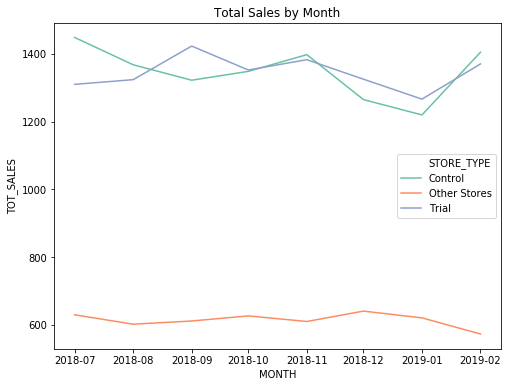

In [949]:
plt.figure(figsize=(8,6))


TotalSale = sns.lineplot(x='MONTH',y='TOT_SALES', hue = 'STORE_TYPE', data=tot_by_month, palette = 'Set2')
TotalSale.set_title('Total Sales by Month')

#### Scale the control store's sales

In [950]:
trial_index = store_measures.loc[store_measures['MONTH_ID'] >= 201902].index
preTrial = store_measures.drop(trial_index)
preTrial

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3110,272,201809,304.7,32,1.125000,1.972222,4.291549
3111,272,201810,430.6,44,1.136364,1.980000,4.349495
3112,272,201811,376.2,41,1.097561,1.933333,4.324138
3113,272,201812,403.9,47,1.000000,1.893617,4.538202


In [952]:
pre_tot = preTrial.groupby('STORE_NBR').sum()['TOT_SALES'].reset_index()

pre_i = pre_tot.loc[pre_tot['STORE_NBR'] !=88].index
pre_88 = pre_tot.drop(pre_i)

pre_j = pre_tot.loc[pre_tot['STORE_NBR'] !=237].index
pre_237 = pre_tot.drop(pre_j)

In [953]:
scalingFactor = pre_88.iloc[0]['TOT_SALES'] /pre_237.iloc[0]['TOT_SALES']
scalingFactor

1.0015583306649594

In [956]:
t_j = store_measures.loc[store_measures['STORE_NBR'] !=237].index
t_237 = store_measures.drop(t_j)

t_i = store_measures.loc[store_measures['STORE_NBR'] !=88].index
t_88 = store_measures.drop(t_i)

t_237['Control_Sale'] = t_237['TOT_SALES']* scalingFactor
t_237

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice,Control_Sale
2700,237,201807,1448.4,128,1.265625,2.000000,4.470370,1450.657086
2701,237,201808,1367.8,135,1.222222,1.896970,4.369968,1369.931485
2702,237,201809,1322.2,126,1.182540,2.006711,4.422074,1324.260425
2703,237,201810,1348.3,123,1.195122,2.034014,4.509365,1350.401097
2704,237,201811,1397.6,132,1.219697,1.987578,4.367500,1399.777923
2705,237,201812,1265.0,124,1.161290,2.006944,4.377163,1266.971288
2706,237,201901,1219.7,117,1.188034,1.992806,4.403249,1221.600696
2707,237,201902,1404.8,126,1.246032,2.000000,4.473885,1406.989143
2708,237,201903,1208.2,119,1.126050,2.044776,4.409489,1210.082775
2709,237,201904,1204.6,120,1.125000,2.014815,4.428676,1206.477165


In [957]:
tot_combine = pd.merge(t_237, t_88, on ='MONTH_ID')
tot_combine = tot_combine.drop(tot_combine.columns[[2,3,4,5,6,10,11,12,13]], axis=1)
tot_combine

,STORE_NBR_x,MONTH_ID,Control_Sale,STORE_NBR_y,TOT_SALES_y
0,237,201807,1450.657086,88,1310.00
1,237,201808,1369.931485,88,1323.80
2,237,201809,1324.260425,88,1423.00
3,237,201810,1350.401097,88,1352.40
4,237,201811,1399.777923,88,1382.80
5,237,201812,1266.971288,88,1325.20
6,237,201901,1221.600696,88,1266.40
7,237,201902,1406.989143,88,1370.20
8,237,201903,1210.082775,88,1477.20
9,237,201904,1206.477165,88,1439.40


In [958]:
tot_combine['Percent_Diff'] = abs(tot_combine['Control_Sale'] - tot_combine['TOT_SALES_y']) /tot_combine['Control_Sale']
tot_combine

,STORE_NBR_x,MONTH_ID,Control_Sale,STORE_NBR_y,TOT_SALES_y,Percent_Diff
0,237,201807,1450.657086,88,1310.00,0.096961
1,237,201808,1369.931485,88,1323.80,0.033674
2,237,201809,1324.260425,88,1423.00,0.074562
3,237,201810,1350.401097,88,1352.40,0.001480
4,237,201811,1399.777923,88,1382.80,0.012129
5,237,201812,1266.971288,88,1325.20,0.045959
6,237,201901,1221.600696,88,1266.40,0.036673
7,237,201902,1406.989143,88,1370.20,0.026147
8,237,201903,1210.082775,88,1477.20,0.220743
9,237,201904,1206.477165,88,1439.40,0.193060


In [959]:
trial_index = tot_combine.loc[tot_combine['MONTH_ID'] >= 201902].index
preTrial = tot_combine.drop(trial_index)

pre_index = tot_combine.loc[tot_combine['MONTH_ID'] < 201902].index
Trial = tot_combine.drop(pre_index)

#### As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period 

In [960]:
stdDev = statistics.stdev(preTrial['Percent_Diff'])
stdDev

0.03346786730307888

#### Let’s create a more visual version of this by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.

In [961]:
store_measures

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3115,272,201902,395.5,45,1.066667,1.895833,4.346154
3116,272,201903,442.3,50,1.060000,1.905660,4.379208
3117,272,201904,445.1,54,1.018519,1.909091,4.239048
3118,272,201905,314.6,34,1.176471,1.775000,4.430986


In [962]:
past_Sales = store_measures.drop(store_measures.columns[[3,4,5,6]], axis=1)
past_Sales

,STORE_NBR,MONTH_ID,TOT_SALES
0,1,201807,206.9
1,1,201808,176.1
2,1,201809,278.8
3,1,201810,188.1
4,1,201811,192.6
...,...,...,...
3115,272,201902,395.5
3116,272,201903,442.3
3117,272,201904,445.1
3118,272,201905,314.6


In [963]:
def classification(row):
    if row['STORE_NBR'] == 88:
        return 'Trial'
    elif row['STORE_NBR'] == 237:
        return 'Control'
    else:
        return 'Other Stores'

past_Sales['STORE_TYPE'] = past_Sales.apply(classification, axis=1)


i = past_Sales.loc[past_Sales['STORE_TYPE']=='Other Stores'].index
past_Sales = past_Sales.drop(i)
past_Sales

,STORE_NBR,MONTH_ID,TOT_SALES,STORE_TYPE
984,88,201807,1310.00,Trial
985,88,201808,1323.80,Trial
986,88,201809,1423.00,Trial
987,88,201810,1352.40,Trial
988,88,201811,1382.80,Trial
989,88,201812,1325.20,Trial
990,88,201901,1266.40,Trial
991,88,201902,1370.20,Trial
992,88,201903,1477.20,Trial
993,88,201904,1439.40,Trial


In [964]:
i = past_Sales.loc[past_Sales['STORE_NBR']!=237].index
measure_95 = past_Sales.drop(i)
measure_95['TOT_SALES'] = measure_95['TOT_SALES'] * (1 + stdDev * 2)
measure_95['STORE_TYPE'] = 'Control 95th % confidence'
measure_95

,STORE_NBR,MONTH_ID,TOT_SALES,STORE_TYPE
2700,237,201807,1545.349718,Control 95th % confidence
2701,237,201808,1459.354698,Control 95th % confidence
2702,237,201809,1410.702428,Control 95th % confidence
2703,237,201810,1438.549451,Control 95th % confidence
2704,237,201811,1491.149383,Control 95th % confidence
2705,237,201812,1349.673704,Control 95th % confidence
2706,237,201901,1301.341515,Control 95th % confidence
2707,237,201902,1498.831320,Control 95th % confidence
2708,237,201903,1289.071755,Control 95th % confidence
2709,237,201904,1285.230786,Control 95th % confidence


In [965]:
j = past_Sales.loc[past_Sales['STORE_NBR']!=237].index
measure_5 = past_Sales.drop(j)
measure_5['TOT_SALES'] = measure_5['TOT_SALES'] * (1 - stdDev * 2)
measure_5['STORE_TYPE'] = 'Control 5th % confidence'
measure_5


,STORE_NBR,MONTH_ID,TOT_SALES,STORE_TYPE
2700,237,201807,1351.450282,Control 5th % confidence
2701,237,201808,1276.245302,Control 5th % confidence
2702,237,201809,1233.697572,Control 5th % confidence
2703,237,201810,1258.050549,Control 5th % confidence
2704,237,201811,1304.050617,Control 5th % confidence
2705,237,201812,1180.326296,Control 5th % confidence
2706,237,201901,1138.058485,Control 5th % confidence
2707,237,201902,1310.768680,Control 5th % confidence
2708,237,201903,1127.328245,Control 5th % confidence
2709,237,201904,1123.969214,Control 5th % confidence


In [966]:
assessment = pd.concat([past_Sales, measure_95, measure_5])
assessment['MONTH'] = pd.to_datetime(assessment['MONTH_ID'].astype(int),format='%Y%m')
assessment.head()

,STORE_NBR,MONTH_ID,TOT_SALES,STORE_TYPE,MONTH
984,88,201807,1310.0,Trial,2018-07-01
985,88,201808,1323.8,Trial,2018-08-01
986,88,201809,1423.0,Trial,2018-09-01
987,88,201810,1352.4,Trial,2018-10-01
988,88,201811,1382.8,Trial,2018-11-01


[(0, 1600)]

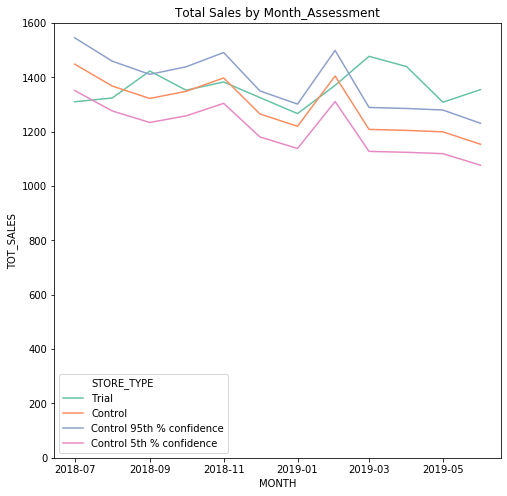

In [969]:
plt.figure(figsize=(8,8))

ass = sns.lineplot(x='MONTH',y='TOT_SALES', hue = 'STORE_TYPE', data=assessment, palette = 'Set2')
ass.set_title('Total Sales by Month_Assessment')
ass. set(ylim=(0, 1600))

#### The results show that the trial in store 88 is significantly different to its control store in the trial period as the trial store performance lies outside of the 5% to 95% confidence interval of the control store in two of the three trial months.

#### Assessing for number of customers as well

#### Scale the control store's number of customers

In [971]:
trial_index = store_measures.loc[store_measures['MONTH_ID'] >= 201902].index
preTrial = store_measures.drop(trial_index)
preTrial

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3110,272,201809,304.7,32,1.125000,1.972222,4.291549
3111,272,201810,430.6,44,1.136364,1.980000,4.349495
3112,272,201811,376.2,41,1.097561,1.933333,4.324138
3113,272,201812,403.9,47,1.000000,1.893617,4.538202


In [972]:
pre_cus = preTrial.groupby('STORE_NBR').sum()['Num_Cus'].reset_index()

pre_i = pre_cus.loc[pre_cus['STORE_NBR'] !=88].index
pre_88 = pre_cus.drop(pre_i)

pre_j = pre_cus.loc[pre_cus['STORE_NBR'] !=237].index
pre_237 = pre_cus.drop(pre_j)

In [974]:
scalingFactor = pre_88.iloc[0]['Num_Cus'] /pre_237.iloc[0]['Num_Cus']
scalingFactor

0.9943502824858758

In [975]:
t_j = store_measures.loc[store_measures['STORE_NBR'] !=237].index
t_237 = store_measures.drop(t_j)

t_i = store_measures.loc[store_measures['STORE_NBR'] !=88].index
t_88 = store_measures.drop(t_i)

t_237['Control_nCus'] = t_237['Num_Cus']* scalingFactor
t_237

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice,Control_nCus
2700,237,201807,1448.4,128,1.265625,2.000000,4.470370,127.276836
2701,237,201808,1367.8,135,1.222222,1.896970,4.369968,134.237288
2702,237,201809,1322.2,126,1.182540,2.006711,4.422074,125.288136
2703,237,201810,1348.3,123,1.195122,2.034014,4.509365,122.305085
2704,237,201811,1397.6,132,1.219697,1.987578,4.367500,131.254237
2705,237,201812,1265.0,124,1.161290,2.006944,4.377163,123.299435
2706,237,201901,1219.7,117,1.188034,1.992806,4.403249,116.338983
2707,237,201902,1404.8,126,1.246032,2.000000,4.473885,125.288136
2708,237,201903,1208.2,119,1.126050,2.044776,4.409489,118.327684
2709,237,201904,1204.6,120,1.125000,2.014815,4.428676,119.322034


In [976]:
tot_combine = pd.merge(t_237, t_88, on ='MONTH_ID')
tot_combine = tot_combine.drop(tot_combine.columns[[2,3,4,5,6,9,11,12,13]], axis=1)
tot_combine

,STORE_NBR_x,MONTH_ID,Control_nCus,STORE_NBR_y,Num_Cus_y
0,237,201807,127.276836,88,129
1,237,201808,134.237288,88,131
2,237,201809,125.288136,88,124
3,237,201810,122.305085,88,123
4,237,201811,131.254237,88,130
5,237,201812,123.299435,88,126
6,237,201901,116.338983,88,117
7,237,201902,125.288136,88,124
8,237,201903,118.327684,88,134
9,237,201904,119.322034,88,128


In [977]:
tot_combine['Percent_Diff'] = abs(tot_combine['Control_nCus'] - tot_combine['Num_Cus_y']) /tot_combine['Control_nCus']
tot_combine

,STORE_NBR_x,MONTH_ID,Control_nCus,STORE_NBR_y,Num_Cus_y,Percent_Diff
0,237,201807,127.276836,88,129,0.013539
1,237,201808,134.237288,88,131,0.024116
2,237,201809,125.288136,88,124,0.010281
3,237,201810,122.305085,88,123,0.005682
4,237,201811,131.254237,88,130,0.009556
5,237,201812,123.299435,88,126,0.021902
6,237,201901,116.338983,88,117,0.005682
7,237,201902,125.288136,88,124,0.010281
8,237,201903,118.327684,88,134,0.132448
9,237,201904,119.322034,88,128,0.072727


In [978]:
trial_index = tot_combine.loc[tot_combine['MONTH_ID'] >= 201902].index
preTrial = tot_combine.drop(trial_index)

pre_index = tot_combine.loc[tot_combine['MONTH_ID'] < 201902].index
Trial = tot_combine.drop(pre_index)

In [979]:
stdDev = statistics.stdev(preTrial['Percent_Diff'])
stdDev

0.00741024435207507

#### Visual checks on trends based on Number of Customers

In [980]:
store_measures

,STORE_NBR,MONTH_ID,TOT_SALES,Num_Cus,Trans_PerCus,nChips_PerTrans,AvgPrice
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3115,272,201902,395.5,45,1.066667,1.895833,4.346154
3116,272,201903,442.3,50,1.060000,1.905660,4.379208
3117,272,201904,445.1,54,1.018519,1.909091,4.239048
3118,272,201905,314.6,34,1.176471,1.775000,4.430986


In [981]:
past_nCus = store_measures.drop(store_measures.columns[[2,4,5,6]], axis=1)
past_nCus

,STORE_NBR,MONTH_ID,Num_Cus
0,1,201807,49
1,1,201808,42
2,1,201809,59
3,1,201810,44
4,1,201811,46
...,...,...,...
3115,272,201902,45
3116,272,201903,50
3117,272,201904,54
3118,272,201905,34


In [982]:
def classification(row):
    if row['STORE_NBR'] == 88:
        return 'Trial'
    elif row['STORE_NBR'] == 237:
        return 'Control'
    else:
        return 'Other Stores'

past_nCus['STORE_TYPE'] = past_nCus.apply(classification, axis=1)


i = past_nCus.loc[past_nCus['STORE_TYPE']=='Other Stores'].index
past_nCus = past_nCus.drop(i)
past_nCus

,STORE_NBR,MONTH_ID,Num_Cus,STORE_TYPE
984,88,201807,129,Trial
985,88,201808,131,Trial
986,88,201809,124,Trial
987,88,201810,123,Trial
988,88,201811,130,Trial
989,88,201812,126,Trial
990,88,201901,117,Trial
991,88,201902,124,Trial
992,88,201903,134,Trial
993,88,201904,128,Trial


In [983]:
i = past_nCus.loc[past_nCus['STORE_NBR']!=237].index
measure_95 = past_nCus.drop(i)
measure_95['Num_Cus'] = measure_95['Num_Cus'] * (1 + stdDev * 2)
measure_95['STORE_TYPE'] = 'Control 95th % confidence'
measure_95

,STORE_NBR,MONTH_ID,Num_Cus,STORE_TYPE
2700,237,201807,129.897023,Control 95th % confidence
2701,237,201808,137.000766,Control 95th % confidence
2702,237,201809,127.867382,Control 95th % confidence
2703,237,201810,124.822920,Control 95th % confidence
2704,237,201811,133.956305,Control 95th % confidence
2705,237,201812,125.837741,Control 95th % confidence
2706,237,201901,118.733997,Control 95th % confidence
2707,237,201902,127.867382,Control 95th % confidence
2708,237,201903,120.763638,Control 95th % confidence
2709,237,201904,121.778459,Control 95th % confidence


In [984]:
j = past_nCus.loc[past_nCus['STORE_NBR']!=237].index
measure_5 = past_nCus.drop(i)
measure_5['Num_Cus'] = measure_5['Num_Cus'] * (1 - stdDev * 2)
measure_5['STORE_TYPE'] = 'Control 5th % confidence'
measure_5

,STORE_NBR,MONTH_ID,Num_Cus,STORE_TYPE
2700,237,201807,126.102977,Control 5th % confidence
2701,237,201808,132.999234,Control 5th % confidence
2702,237,201809,124.132618,Control 5th % confidence
2703,237,201810,121.177080,Control 5th % confidence
2704,237,201811,130.043695,Control 5th % confidence
2705,237,201812,122.162259,Control 5th % confidence
2706,237,201901,115.266003,Control 5th % confidence
2707,237,201902,124.132618,Control 5th % confidence
2708,237,201903,117.236362,Control 5th % confidence
2709,237,201904,118.221541,Control 5th % confidence


In [985]:
assessment = pd.concat([past_nCus, measure_95, measure_5])
assessment['MONTH'] = pd.to_datetime(assessment['MONTH_ID'].astype(int),format='%Y%m')
assessment.head()

,STORE_NBR,MONTH_ID,Num_Cus,STORE_TYPE,MONTH
984,88,201807,129.0,Trial,2018-07-01
985,88,201808,131.0,Trial,2018-08-01
986,88,201809,124.0,Trial,2018-09-01
987,88,201810,123.0,Trial,2018-10-01
988,88,201811,130.0,Trial,2018-11-01


[(0, 150)]

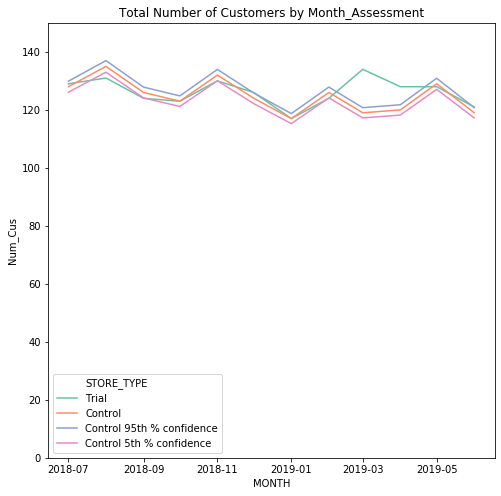

In [989]:
plt.figure(figsize=(8,8))

ass = sns.lineplot(x='MONTH',y='Num_Cus', hue = 'STORE_TYPE', data=assessment, palette = 'Set2')
ass.set_title('Total Number of Customers by Month_Assessment')
ass. set(ylim=(0, 150))

#### Total number of customers in the trial period for the trial store is significantly higher than the control store for two out of three months, which indicates a positive trial effect.

## Conclusion

#### We’ve found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively.
#### The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the three trial months but this is not the case for trial store 86. We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase in sales.